For the Exploratory Data Analysis it may be complex to follow because there are a number of different datasets to consider. Firstly, the water data will be considered independently to understand trends, seasonality and cyclic behaviour as well as distributions and geospatial analysis. It is important that this is completed independently rather then on the merged dataset because through mergeing we have lost a lot of the data so the conclusions will be more valid based on the original data. 

For relationship analysis like correlation and scatter plots, we will used the merged data, to see how we merged and preprocessed all data, refer to the other files in the repository. 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

## Read all the data into different dataframes. 

In [ ]:
# read in the water data 
water = pd.read_csv('Water Data Pre-processed.csv')
# read in the land use data 
landuse = pd.read_csv('land_use_data.csv')
# read the merged dataset 
merged = pd.read_csv('FINAL.csv')
# read the local authority boundaries data into a gdf 
boundaries = gpd.read_file("Local_Authority_Districts_December_2022_UK_BUC_V2_-1856850221694639751.geojson")

In [3]:

# Assuming 'df' is your DataFrame and 'numeric_cols' is a list of numeric columns
numeric_cols = water.select_dtypes(include='number').columns

# 1. Calculate Q1, Q3, and IQR for numeric columns
Q1 = water[numeric_cols].quantile(0.1)  # First quartile (25th percentile)
Q3 = water[numeric_cols].quantile(0.9)  # Third quartile (75th percentile)
IQR = Q3 - Q1                         # Interquartile range

# 2. Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:\n", Q1, "\nQ3:\n", Q3, "\nIQR:\n", IQR)
print("\nLower Bound:\n", lower_bound, "\nUpper Bound:\n", upper_bound)

# 3. Replace outliers with Q1 or Q3 based on the condition
water_no_outliers = water.copy()

for col in numeric_cols:
    # Replace values below the lower bound with Q1
    water_no_outliers[col] = water_no_outliers[col].apply(lambda x: Q1[col] if x < lower_bound[col] else x)
    # Replace values above the upper bound with Q3
    water_no_outliers[col] = water_no_outliers[col].apply(lambda x: Q3[col] if x > upper_bound[col] else x)

print("\nOriginal DataFrame:")
print(water)

print("\nDataFrame with Replaced Outliers:")
print(water_no_outliers)
print(f"Original shape: {water.shape}, New shape: {water_no_outliers.shape}")


Q1:
 Unnamed: 0    1714168.20
northing        92953.00
easting        312662.00
result              0.03
year             2014.00
Name: 0.1, dtype: float64 
Q3:
 Unnamed: 0    17354113.20
northing        513438.00
easting         552173.00
result               8.63
year              2024.00
Name: 0.9, dtype: float64 
IQR:
 Unnamed: 0    15639945.0
northing        420485.0
easting         239511.0
result               8.6
year                10.0
dtype: float64

Lower Bound:
 Unnamed: 0   -21745749.30
northing       -537774.50
easting         -46604.50
result             -12.87
year              1999.00
dtype: float64 
Upper Bound:
 Unnamed: 0    40814030.70
northing       1144165.50
easting         911439.50
result              21.53
year              2039.00
dtype: float64

Original DataFrame:
         Unnamed: 0  compliance     sample_date_time  northing  easting  \
0                44       False  2014-01-20 12:29:00    241400   463800   
1                47       False  2014-01-20 

## General EDA of Water Data 

In [4]:
water_no_outliers.head()

Unnamed: 0  compliance     sample_date_time  northing  easting  \
0          44       False  2014-01-20 12:29:00    241400   463800   
1          47       False  2014-01-20 12:29:00    241400   463800   
2          51       False  2014-01-20 12:29:00    241400   463800   
3          56       False  2014-01-20 12:29:00    241400   463800   
4          59       False  2014-02-12 11:22:00    241400   463800   

  determinand_label             determinand_def  result determinand_unit  \
0      Sld Sus@105C  Solids, Suspended at 105 C  16.800             mg/l   
1                pH                          pH   8.000          phunits   
2        Ammonia(N)    Ammoniacal Nitrogen as N   0.036             mg/l   
3         Nitrate-N                Nitrate as N   4.270             mg/l   
4      Sld Sus@105C  Solids, Suspended at 105 C   8.630             mg/l   

                     sample_type  year  
0  RIVER / RUNNING SURFACE WATER  2014  
1  RIVER / RUNNING SURFACE WATER  2014  
2  RIVER / RUNNING SURFACE WATER  2014  
3  RIVER / RUNNING SURFACE WATER  2014  
4  RIVER / RUNNING SURFACE WATER  2014

In [5]:
water_no_outliers.shape

(1614739, 11)

In [6]:
water_no_outliers.describe()

Unnamed: 0      northing       easting        result          year
count  1.614739e+06  1.614739e+06  1.614739e+06  1.614739e+06  1.614739e+06
mean   9.718305e+06  2.889729e+05  4.261246e+05  4.523448e+00  2.018777e+03
std    5.629149e+06  1.564840e+05  9.766191e+04  4.069800e+00  3.468574e+00
min    4.400000e+01  1.000000e+00  1.359540e+05  0.000000e+00  2.014000e+03
25%    4.613774e+06  1.463930e+05  3.662510e+05  1.960000e-01  2.016000e+03
50%    1.032934e+07  2.896290e+05  4.261650e+05  4.070000e+00  2.019000e+03
75%    1.456654e+07  4.042380e+05  4.948610e+05  7.890000e+00  2.022000e+03
max    1.892598e+07  6.532430e+05  6.537000e+05  2.150000e+01  2.024000e+03

In [7]:
# check for nulls
print(water_no_outliers.isnull().sum())

Unnamed: 0           0
compliance           0
sample_date_time     0
northing             0
easting              0
determinand_label    0
determinand_def      0
result               0
determinand_unit     0
sample_type          0
year                 0
dtype: int64


In [8]:
# check dtypes
water_no_outliers.dtypes

Unnamed: 0             int64
compliance              bool
sample_date_time      object
northing               int64
easting                int64
determinand_label     object
determinand_def       object
result               float64
determinand_unit      object
sample_type           object
year                   int64
dtype: object

In [9]:
#change date time column to the appropriate dtype 
water_no_outliers['sample_date_time'] = pd.to_datetime(water['sample_date_time'])

## General EDA of Merged Data 

In [10]:
merged.head()

sample_date_time      local_authority_name  year  grand_total  \
0  2018-01-02 09:03:00            Northumberland  2018     507736.4   
1  2018-01-02 09:38:00                St. Helens  2018      13635.7   
2  2018-01-03 09:53:00  East Riding of Yorkshire  2018     249425.3   
3  2018-01-03 10:23:00  East Riding of Yorkshire  2018     249425.3   
4  2018-01-03 10:56:00  East Riding of Yorkshire  2018     249425.3   

   Ammonia(N)  BOD ATU  Nitrate-N  Sld Sus@105C    pH  industry_percentage  \
0       0.049     1.00       3.49          11.0  8.00             0.044767   
1       0.226     1.24       2.78          30.3  7.68             0.957780   
2       0.225     1.93       8.00         180.0  7.84             0.174361   
3       0.030     1.17       7.53         247.0  7.93             0.174361   
4       0.049     2.09       2.09          46.7  8.35             0.174361   

   minerals_percentage  residential_percentage  transport_percentage  \
0             0.042089                0.240262              1.972677   
1             0.343950                3.722581              8.541549   
2             0.066272                0.483111              2.761588   
3             0.066272                0.483111              2.761588   
4             0.066272                0.483111              2.761588   

   agriculture_percentage  
0               49.791289  
1               47.581716  
2               81.298529  
3               81.298529  
4               81.298529

In [11]:
merged.shape

(16224, 14)

In [12]:
merged.describe()

year    grand_total    Ammonia(N)       BOD ATU     Nitrate-N  \
count  16224.000000   16224.000000  16224.000000  16224.000000  16224.000000   
mean    2020.200567   70468.160004      0.545514      2.207473      6.145743   
std        1.279990   78928.996830     40.046187      3.697697      7.519097   
min     2018.000000    1904.000000      0.002000      1.000000      0.004000   
25%     2019.000000   16938.000000      0.030000      1.100000      2.200000   
50%     2020.000000   55206.000000      0.058000      1.580000      5.140000   
75%     2021.000000   92002.000000      0.160000      2.700000      8.332500   
max     2022.000000  507736.400000   5100.000000    290.000000    690.000000   

       Sld Sus@105C            pH  industry_percentage  minerals_percentage  \
count  16224.000000  16224.000000         16224.000000         16224.000000   
mean      18.511246      7.864857             0.526710             0.090842   
std       69.828327      0.359138             0.539853             0.269035   
min        1.800000      3.380000             0.020371             0.000000   
25%        4.800000      7.670000             0.153469             0.000000   
50%        8.000000      7.900000             0.286924             0.010751   
75%       15.000000      8.090000             0.749987             0.066407   
max     5600.000000     10.180000             5.272654             1.448730   

       residential_percentage  transport_percentage  agriculture_percentage  
count            16224.000000          16224.000000            16224.000000  
mean                 2.043608              5.605645               57.714913  
std                  2.224984              3.568568               19.943808  
min                  0.124370              1.484548                0.052493  
25%                  0.662453              3.604748               42.917123  
50%                  1.206317              4.214903               66.891332  
75%                  2.536982              6.307951               70.354779  
max                 18.067227             22.737840               85.709580

In [13]:
# check for nulls
print(merged.isnull().sum())

sample_date_time          0
local_authority_name      0
year                      0
grand_total               0
Ammonia(N)                0
BOD ATU                   0
Nitrate-N                 0
Sld Sus@105C              0
pH                        0
industry_percentage       0
minerals_percentage       0
residential_percentage    0
transport_percentage      0
agriculture_percentage    0
dtype: int64


In [14]:
# check dtypes
merged.dtypes

sample_date_time           object
local_authority_name       object
year                        int64
grand_total               float64
Ammonia(N)                float64
BOD ATU                   float64
Nitrate-N                 float64
Sld Sus@105C              float64
pH                        float64
industry_percentage       float64
minerals_percentage       float64
residential_percentage    float64
transport_percentage      float64
agriculture_percentage    float64
dtype: object

In [15]:
#change date time column to the appropriate dtype 
merged['sample_date_time'] = pd.to_datetime(merged['sample_date_time'])

## General Interesting Findings to Consider 

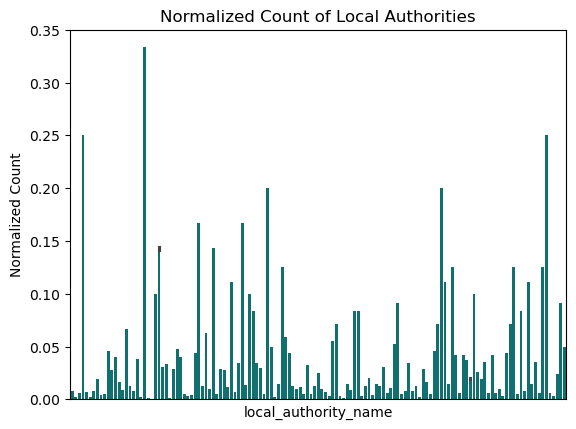

In [16]:
# Normalize by dividing the count by the 'grand_total' column
merged['normalized_count'] = merged.groupby('local_authority_name')['grand_total'].transform(lambda x: x / x.sum())

# Create the countplot with alphabetically ordered local authority names
sns.barplot(x=merged['local_authority_name'], y=merged['normalized_count'], order=sorted(merged['local_authority_name'].unique()), color='teal')

# Remove the x-axis labels
plt.xticks([])

# Set the title and y-axis label
plt.title("Normalized Count of Local Authorities")
plt.ylabel("Normalized Count")

# Show the plot
plt.show()


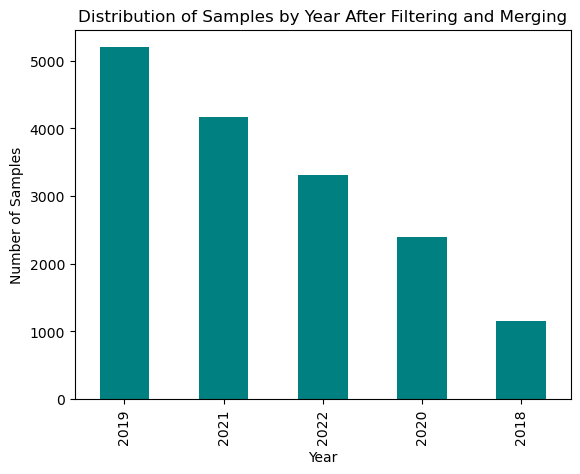

In [17]:
merged['year'].value_counts().plot(kind='bar', color='teal')
plt.title('Distribution of Samples by Year After Filtering and Merging')  # Adding a title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Number of Samples')  # Label for the y-axis
plt.show()  # Display the plot


## Time Series Analysis 

Plotting time series for each parameter with a moving average, with outliers removed. 

To be better understand the plots, we have plotted a following graph to understand the blocks of colout better, some log transformations have been used where it prived better visualisation. 

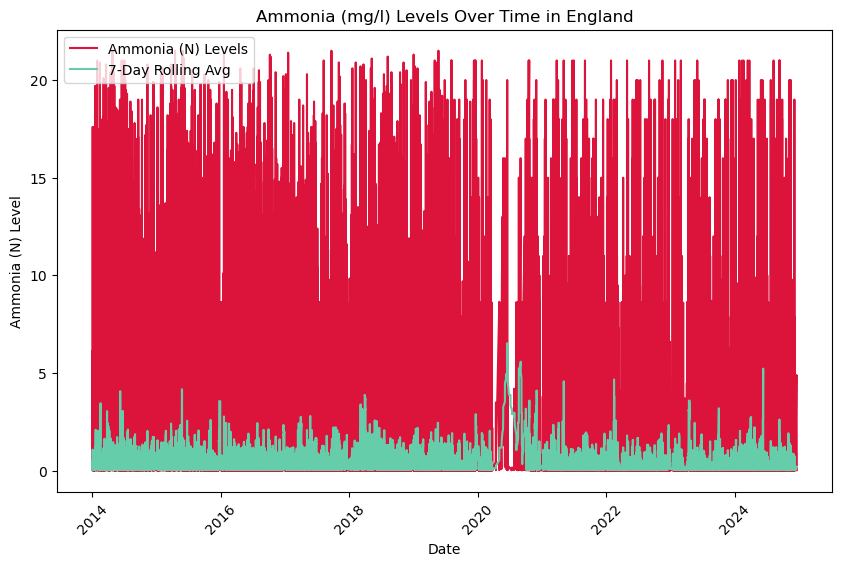

In [18]:
# Filter for Ammonia(N) measurements
df_ammonia = water_no_outliers[water_no_outliers["determinand_label"] == "Ammonia(N)"].copy()

# Sort values by time (optional but recommended)
df_ammonia = df_ammonia.sort_values(by="sample_date_time")

# Compute rolling average (7-day window)
df_ammonia["rolling_avg"] = df_ammonia["result"].rolling(window=30, min_periods=1).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data points
ax.plot(df_ammonia["sample_date_time"], df_ammonia["result"], color="crimson", label="Ammonia (N) Levels")

# Plot rolling average
ax.plot(df_ammonia["sample_date_time"], df_ammonia["rolling_avg"], color="mediumaquamarine", label="7-Day Rolling Avg")

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Ammonia (N) Level")
ax.set_title("Ammonia (mg/l) Levels Over Time in England")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
ax.legend()  # Show legend

plt.show()


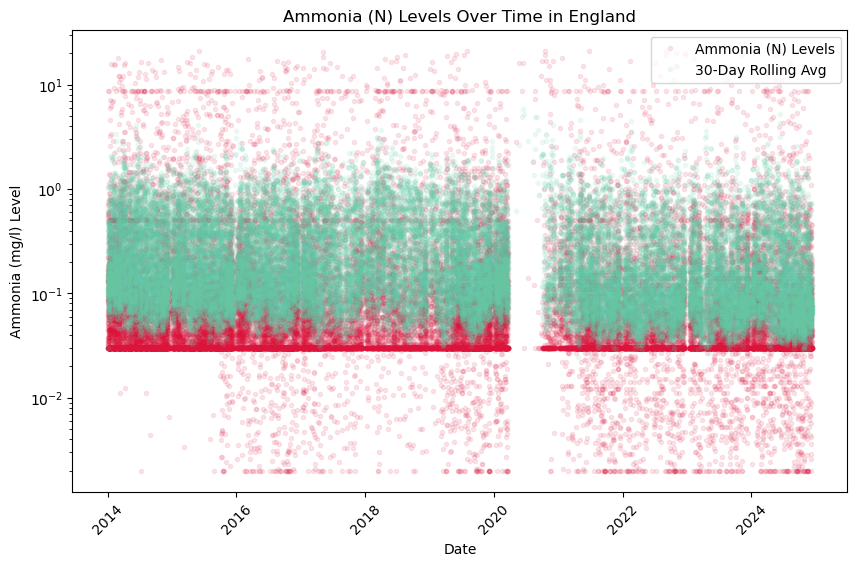

In [19]:

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data points without lines, smaller and transparent markers
ax.plot(df_ammonia["sample_date_time"][::10], df_ammonia["result"][::10], 
        marker='o', color="crimson", label="Ammonia (N) Levels", markersize=3, alpha=0.1, linestyle='')

# Plot rolling average without lines, smaller and transparent markers
ax.plot(df_ammonia["sample_date_time"][::10], df_ammonia["rolling_avg"][::10], 
        marker='o', color="mediumaquamarine", label="30-Day Rolling Avg", markersize=3, alpha=0.1, linestyle='')

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Ammonia (mg/l) Level")
ax.set_title("Ammonia (N) Levels Over Time in England")

# Set the y-axis to log scale
ax.set_yscale('log')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show legend
ax.legend()

# Display the plot
plt.show()


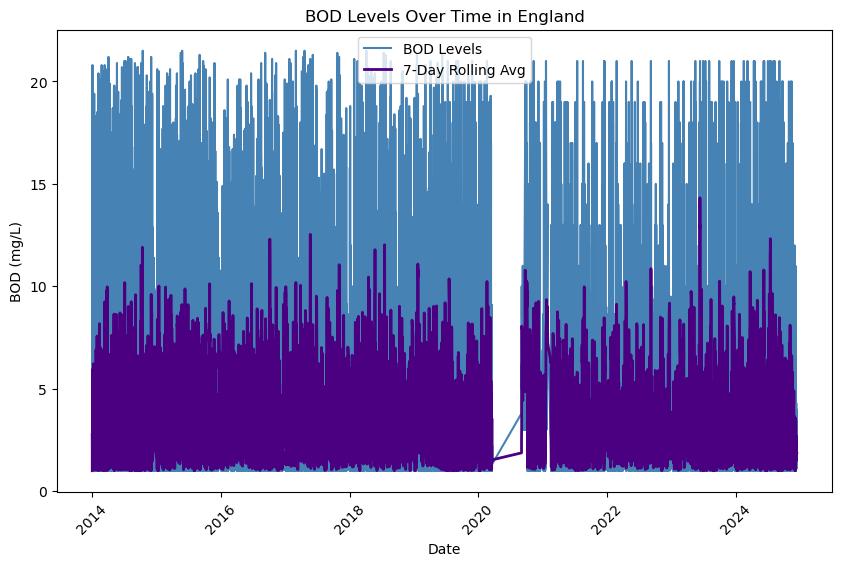

In [20]:
# Filter for BOD ATU measurements
df_bod = water_no_outliers[water_no_outliers["determinand_label"] == "BOD ATU"].copy()
# Sort values by time (optional but recommended)
df_bod = df_bod.sort_values(by="sample_date_time")

# Compute rolling average (7-day window)
df_bod["rolling_avg"] = df_bod["result"].rolling(window=7, min_periods=1).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data points
ax.plot(df_bod["sample_date_time"], df_bod["result"], linestyle="-", color="steelblue", label="BOD Levels")

# Plot rolling average
ax.plot(df_bod["sample_date_time"], df_bod["rolling_avg"], linestyle="-", color="indigo", linewidth=2, label="7-Day Rolling Avg")

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("BOD (mg/L)")
ax.set_title("BOD Levels Over Time in England")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
ax.legend()  # Show legend

plt.show()

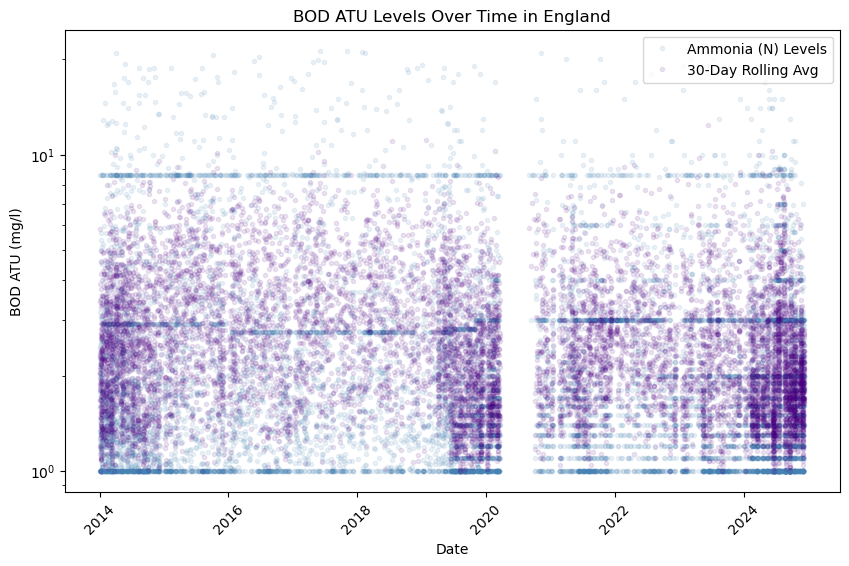

In [21]:

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data points without lines, smaller and transparent markers
ax.plot(df_bod["sample_date_time"][::10], df_bod["result"][::10], 
        marker='o', color="steelblue", label="Ammonia (N) Levels", markersize=3, alpha=0.1, linestyle='')

# Plot rolling average without lines, smaller and transparent markers
ax.plot(df_bod["sample_date_time"][::10], df_bod["rolling_avg"][::10], 
        marker='o', color="indigo", label="30-Day Rolling Avg", markersize=3, alpha=0.1, linestyle='')

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("BOD ATU (mg/l)")
ax.set_title("BOD ATU Levels Over Time in England")

# Set the y-axis to log scale
ax.set_yscale('log')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show legend
ax.legend()

# Display the plot
plt.show()


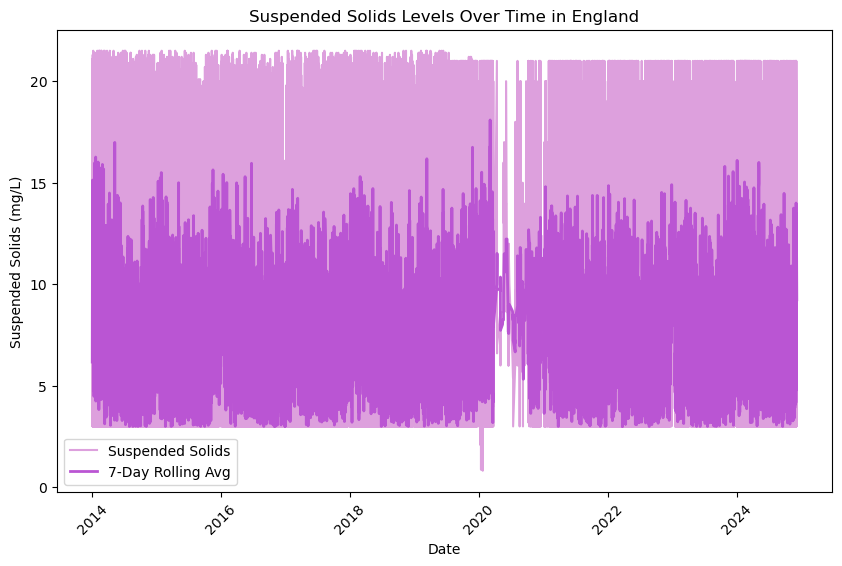

In [22]:
# Filter for Suspended Solids (Sld Sus@105C) measurements
df_ss = water_no_outliers[water_no_outliers["determinand_label"] == "Sld Sus@105C"].copy()

# Sort values by time (optional but recommended)
df_ss = df_ss.sort_values(by="sample_date_time")

# Compute rolling average (7-day window)
df_ss["rolling_avg"] = df_ss["result"].rolling(window=7, min_periods=1).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data points
ax.plot(df_ss["sample_date_time"], df_ss["result"],  linestyle="-", color="plum", label="Suspended Solids")

# Plot rolling average
ax.plot(df_ss["sample_date_time"], df_ss["rolling_avg"], linestyle="-", color="mediumorchid", linewidth=2, label="7-Day Rolling Avg")

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Suspended Solids (mg/L)")
ax.set_title("Suspended Solids Levels Over Time in England")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
ax.legend()  # Show legend

plt.show()


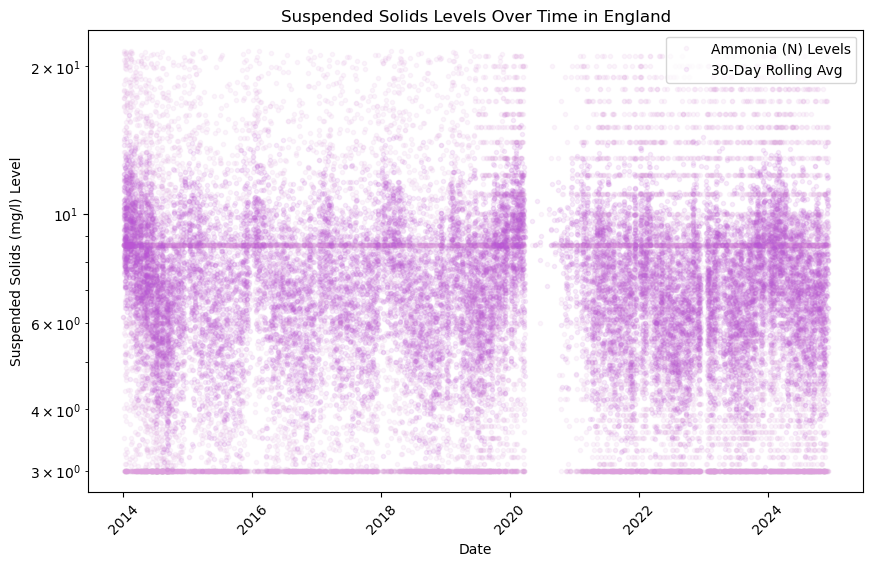

In [23]:

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data points without lines, smaller and transparent markers
ax.plot(df_ss["sample_date_time"][::10], df_ss["result"][::10], 
        marker='o', color="plum", label="Ammonia (N) Levels", markersize=3, alpha=0.1, linestyle='')

# Plot rolling average without lines, smaller and transparent markers
ax.plot(df_ss["sample_date_time"][::10], df_ss["rolling_avg"][::10], 
        marker='o', color="mediumorchid", label="30-Day Rolling Avg", markersize=3, alpha=0.1, linestyle='')

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Suspended Solids (mg/l) Level")
ax.set_title("Suspended Solids Levels Over Time in England")

# Set the y-axis to log scale
ax.set_yscale('log')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show legend
ax.legend()

# Display the plot
plt.show()


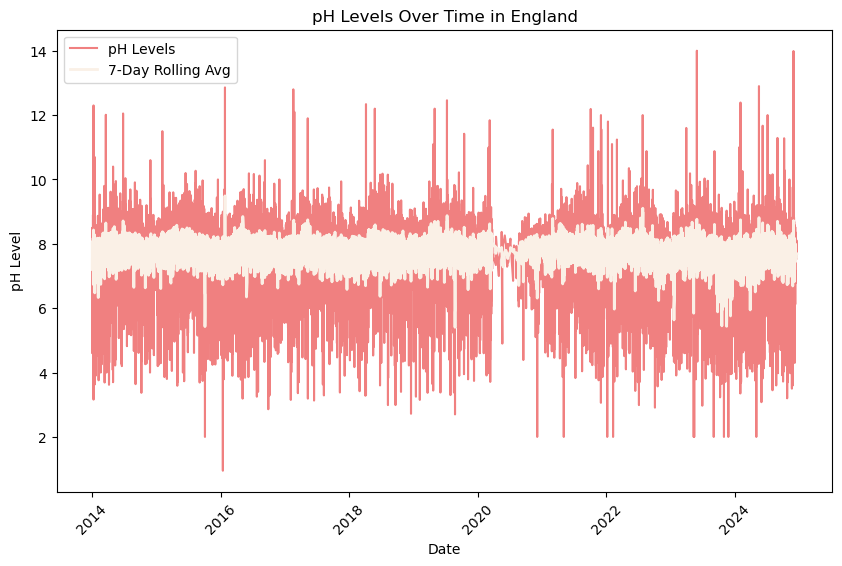

In [24]:
# Filter for pH measurements
df_ph = water_no_outliers[water_no_outliers["determinand_label"] == "pH"].copy()

# Sort values by time (optional but recommended)
df_ph = df_ph.sort_values(by="sample_date_time")

# Compute rolling average (7-day window)
df_ph["rolling_avg"] = df_ph["result"].rolling(window=7, min_periods=1).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data points
ax.plot(df_ph["sample_date_time"], df_ph["result"], linestyle="-", color="lightcoral", label="pH Levels")

# Plot rolling average
ax.plot(df_ph["sample_date_time"], df_ph["rolling_avg"], linestyle="-", color="linen", linewidth=2, label="7-Day Rolling Avg")

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("pH Level")
ax.set_title("pH Levels Over Time in England")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
ax.legend()  # Show legend

plt.show()


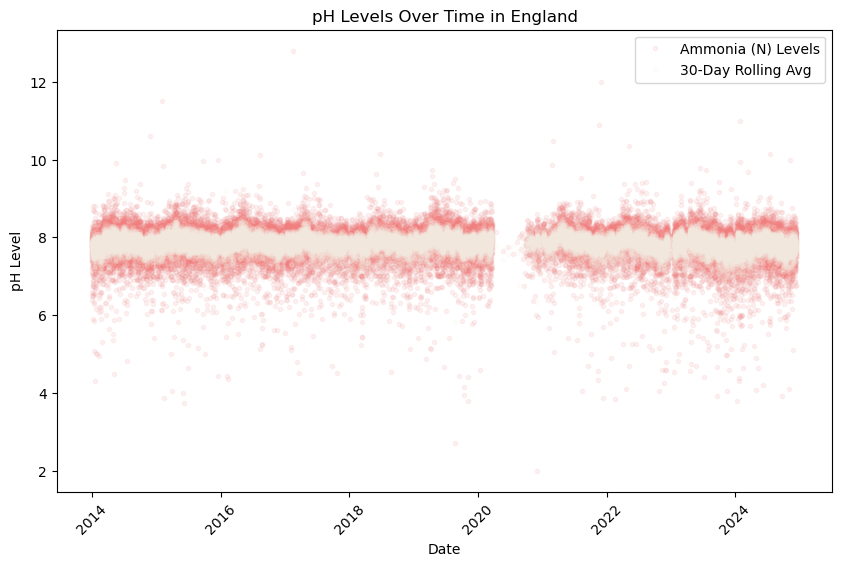

In [25]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data points without lines, smaller and transparent markers
ax.plot(df_ph["sample_date_time"][::10], df_ph["result"][::10], 
        marker='o', color="lightcoral", label="Ammonia (N) Levels", markersize=3, alpha=0.1, linestyle='')

# Plot rolling average without lines, smaller and transparent markers
ax.plot(df_ph["sample_date_time"][::10], df_ph["rolling_avg"][::10], 
        marker='o', color="linen", label="30-Day Rolling Avg", markersize=3, alpha=0.1, linestyle='')

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("pH Level")
ax.set_title("pH Levels Over Time in England")


# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show legend
ax.legend()

# Display the plot
plt.show()


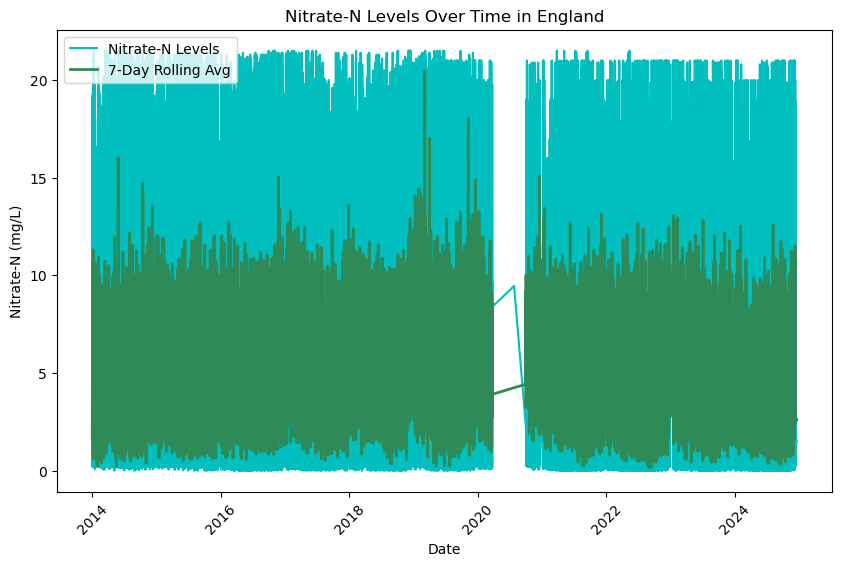

In [26]:
# Filter for Nitrate-N measurements
df_nitrate = water_no_outliers[water_no_outliers["determinand_label"] == "Nitrate-N"].copy()

# Sort values by time (optional but recommended)
df_nitrate = df_nitrate.sort_values(by="sample_date_time")

# Compute rolling average (7-day window)
df_nitrate["rolling_avg"] = df_nitrate["result"].rolling(window=7, min_periods=1).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data points
ax.plot(df_nitrate["sample_date_time"], df_nitrate["result"], linestyle="-", color="c", label="Nitrate-N Levels")

# Plot rolling average
ax.plot(df_nitrate["sample_date_time"], df_nitrate["rolling_avg"], linestyle="-", color="seagreen", linewidth=2, label="7-Day Rolling Avg")

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Nitrate-N (mg/L)")
ax.set_title("Nitrate-N Levels Over Time in England")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
ax.legend()  # Show legend

plt.show()

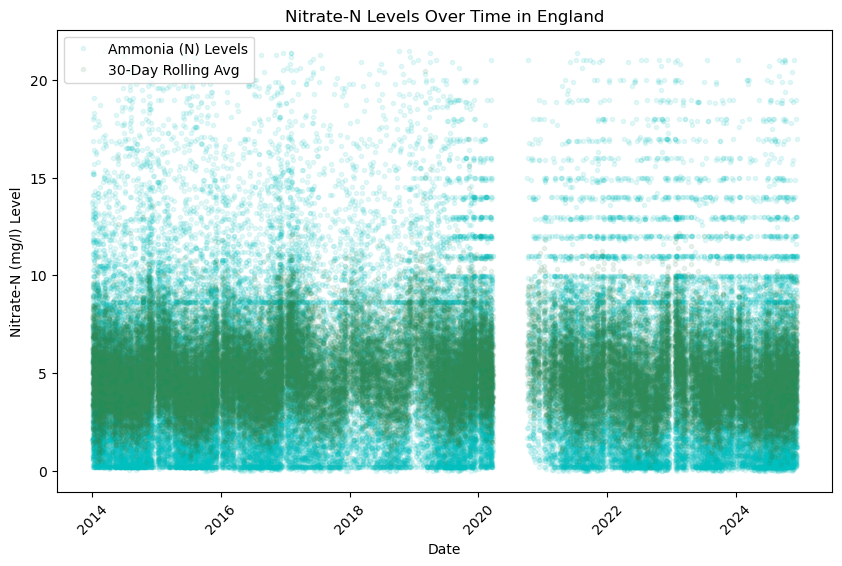

In [27]:

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data points without lines, smaller and transparent markers
ax.plot(df_nitrate["sample_date_time"][::10], df_nitrate["result"][::10], 
        marker='o', color="c", label="Ammonia (N) Levels", markersize=3, alpha=0.1, linestyle='')

# Plot rolling average without lines, smaller and transparent markers
ax.plot(df_nitrate["sample_date_time"][::10], df_nitrate["rolling_avg"][::10], 
        marker='o', color="seagreen", label="30-Day Rolling Avg", markersize=3, alpha=0.1, linestyle='')

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Nitrate-N (mg/l) Level")
ax.set_title("Nitrate-N Levels Over Time in England")
# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show legend
ax.legend()

# Display the plot
plt.show()

## Seasonality 

In [28]:
water_wide = water_no_outliers.pivot_table(
    index=['sample_date_time', 'northing', 'easting', 
       'sample_type', 'year'],
    columns="determinand_label",
    values="result",
    aggfunc="first"
).reset_index()
#drop rows that do not have all paramateres measured so df only contains sampling points where all the parameters have been measured and theres no missing data 
water_reshaped = water_wide.dropna().copy()


In [29]:
water_reshaped.head()

determinand_label    sample_date_time  northing  easting  \
1                 2014-01-02 07:48:00    288663   632717   
4                 2014-01-02 08:06:00    341994   462172   
5                 2014-01-02 08:12:00    341877   462258   
8                 2014-01-02 08:30:00    208900   435383   
13                2014-01-02 08:52:00    208353   435652   

determinand_label                    sample_type  year  Ammonia(N)  BOD ATU  \
1                  RIVER / RUNNING SURFACE WATER  2014       0.072     1.00   
4                  RIVER / RUNNING SURFACE WATER  2014       0.500     1.20   
5                  RIVER / RUNNING SURFACE WATER  2014       0.500     2.06   
8                  RIVER / RUNNING SURFACE WATER  2014       0.030     1.00   
13                 RIVER / RUNNING SURFACE WATER  2014       0.797     4.30   

determinand_label  Nitrate-N  Sld Sus@105C    pH  
1                      12.40         18.10  8.02  
4                       4.57         12.70  8.03  
5                       6.94         12.60  7.81  
8                       6.73          5.77  7.33  
13                      7.07         19.30  7.54

In [30]:
water_reshaped.shape

(33610, 10)

In [31]:
parameters = ['Ammonia(N)', 'BOD ATU', 'Nitrate-N', 'Sld Sus@105C', 'pH']

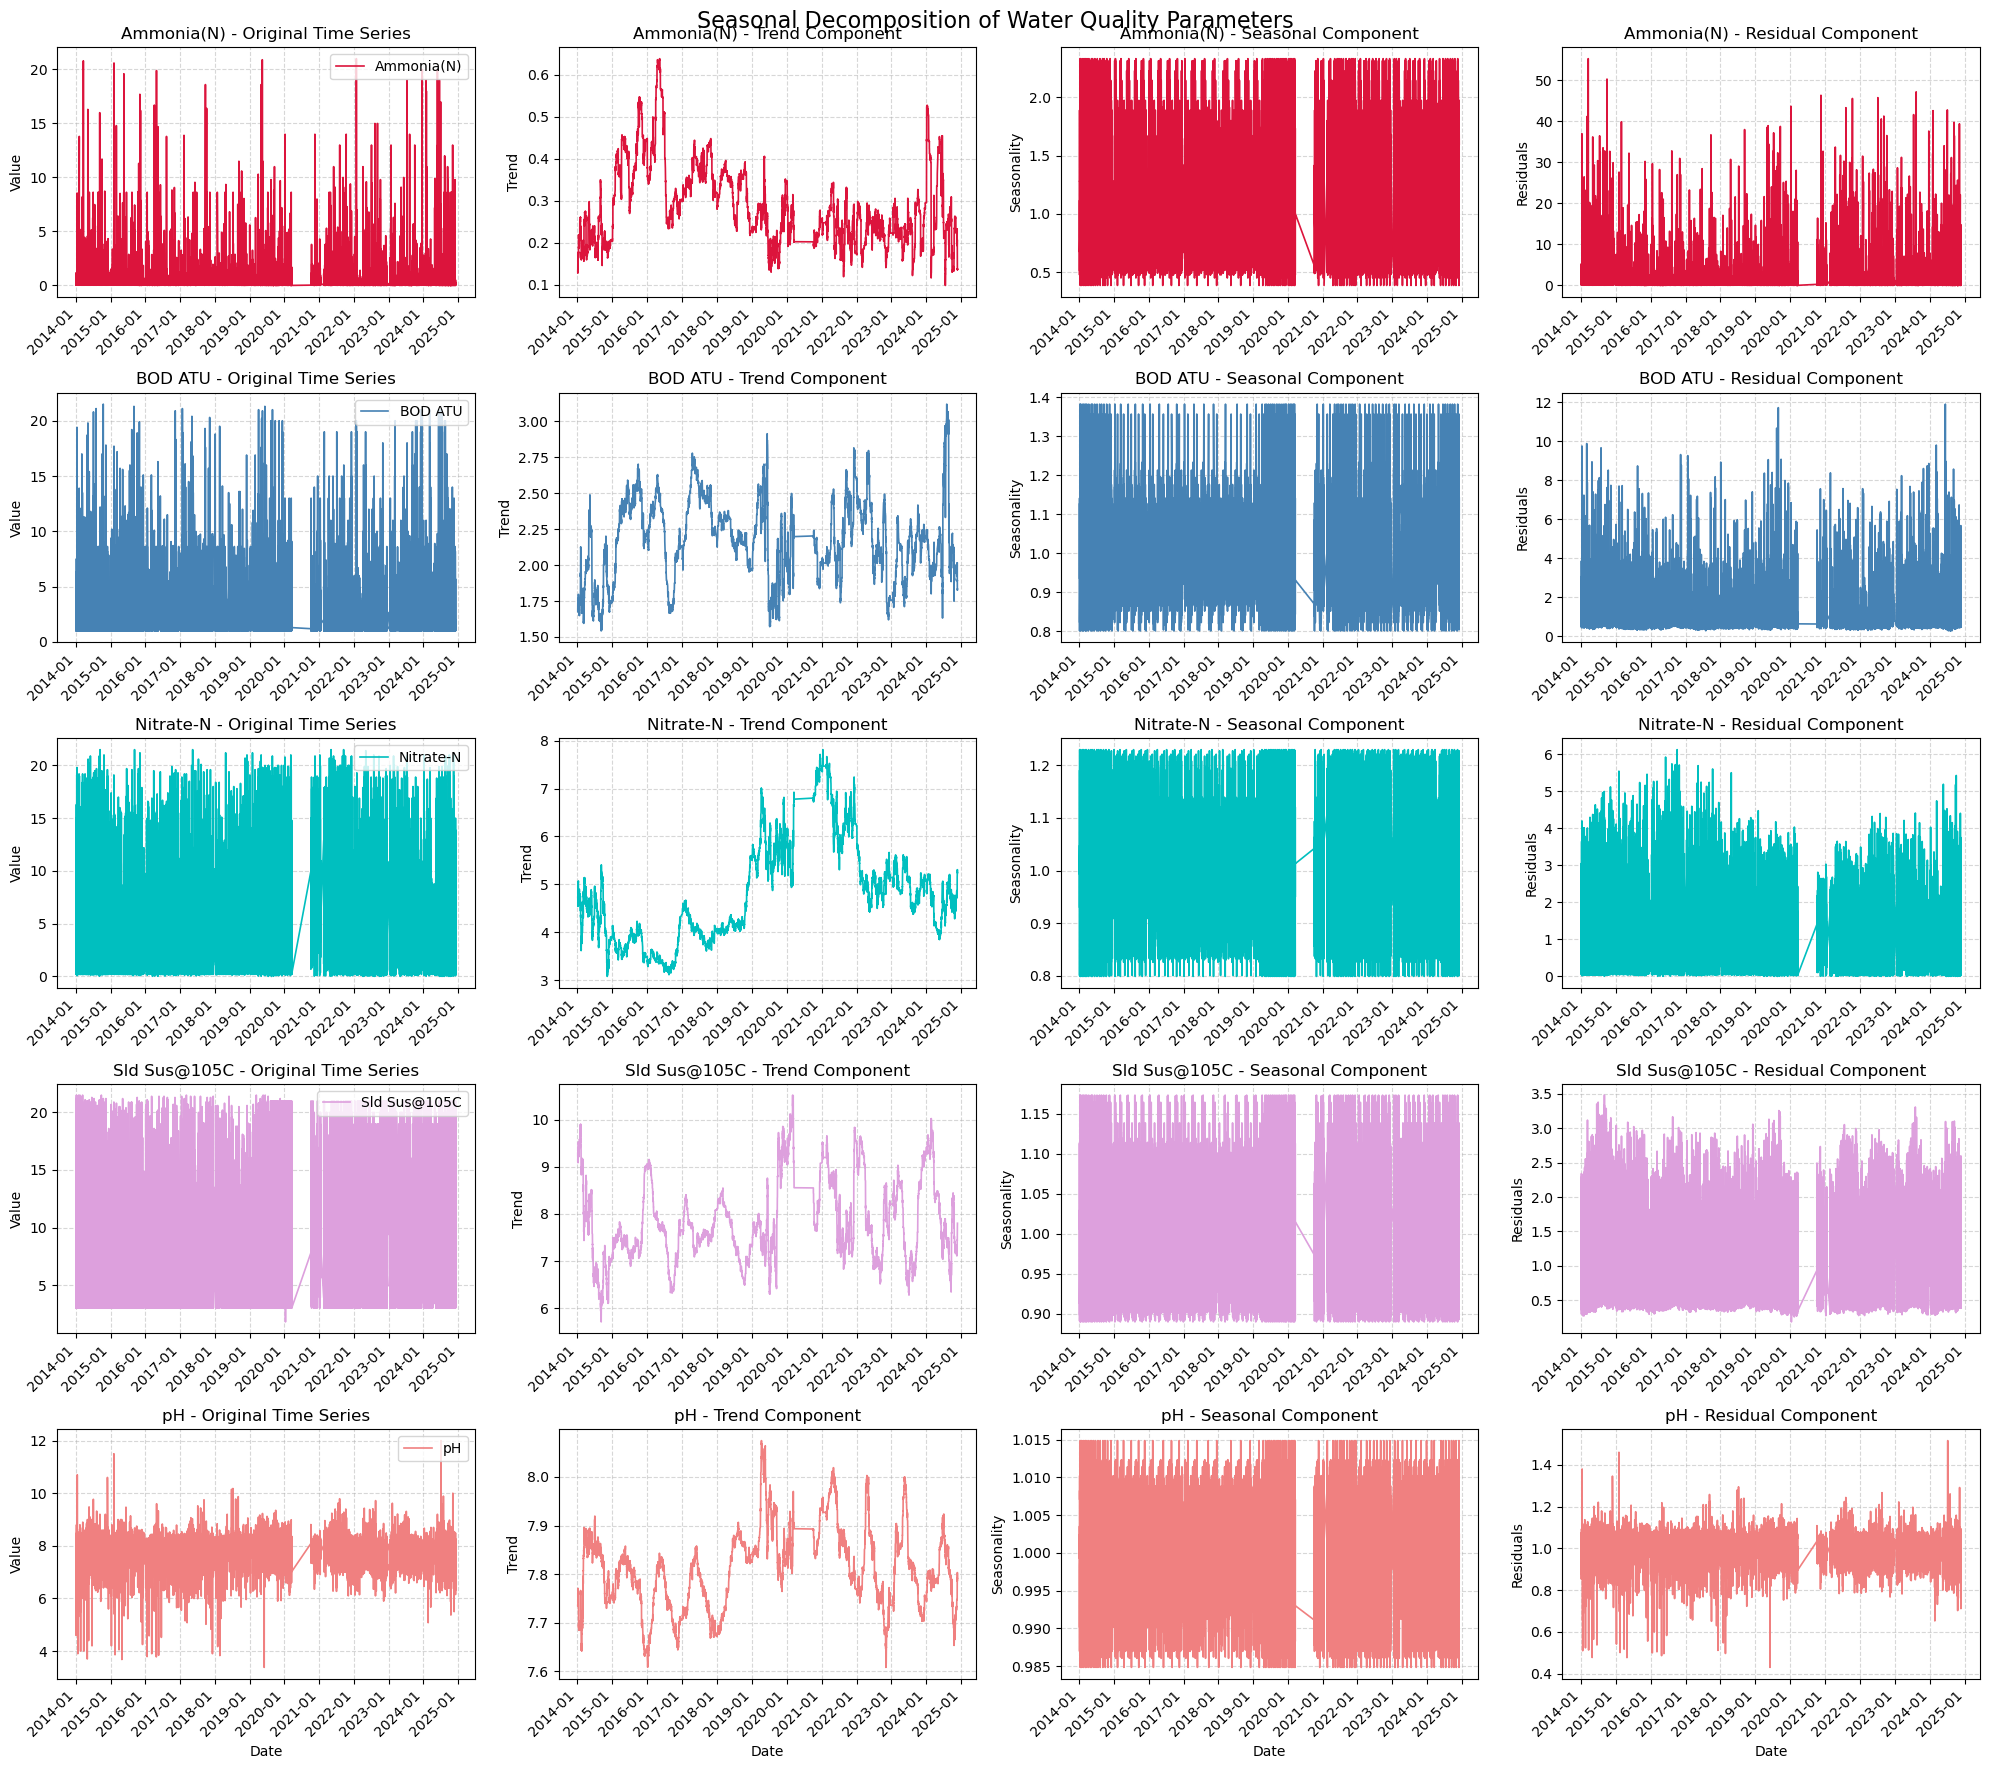

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose


# Ensure the index is in datetime format
water_reshaped.index = pd.to_datetime(water_reshaped['sample_date_time'])


# Define parameters & color mapping
parameters = ["Ammonia(N)", "BOD ATU", "Nitrate-N", "Sld Sus@105C", "pH"]
color_map = {
    "Ammonia(N)": "crimson",
    "BOD ATU": "steelblue",
    "Nitrate-N": "c",   # cyan
    "Sld Sus@105C": "plum",
    "pH": "lightcoral"
}

n_params = len(parameters)


# Create subplots
fig, axes = plt.subplots(nrows=n_params, ncols=4, figsize=(20, 18))


# Loop through each parameter to decompose
for i, col in enumerate(parameters):
    # Select a color from the map (fallback to 'blue' if not found)
    color = color_map.get(col, 'blue')
    
    # Original Time Series
    axes[i, 0].plot(water_reshaped.index, water_reshaped[col], 
                    label=col, color=color, linewidth=1.2)
    axes[i, 0].set_title(f"{col} - Original Time Series", fontsize=12)
    axes[i, 0].set_ylabel("Value", fontsize=10)
    axes[i, 0].grid(True, linestyle='--', alpha=0.5)
    axes[i, 0].legend(loc="upper right")
    
    # Perform Seasonal Decomposition
    decomposition = seasonal_decompose(
        water_reshaped[col],
        model='multiplicative',  # or 'additive' if that fits better
        period=365
    )
    
    # Trend Component
    axes[i, 1].plot(decomposition.trend.index, decomposition.trend,
                    color=color, linewidth=1.2)
    axes[i, 1].set_title(f"{col} - Trend Component", fontsize=12)
    axes[i, 1].set_ylabel("Trend", fontsize=10)
    axes[i, 1].grid(True, linestyle='--', alpha=0.5)
    
    # Seasonal Component
    axes[i, 2].plot(decomposition.seasonal.index, decomposition.seasonal,
                    color=color, linewidth=1.2)
    axes[i, 2].set_title(f"{col} - Seasonal Component", fontsize=12)
    axes[i, 2].set_ylabel("Seasonality", fontsize=10)
    axes[i, 2].grid(True, linestyle='--', alpha=0.5)
    
    # Residual Component
    axes[i, 3].plot(decomposition.resid.index, decomposition.resid,
                    color=color, linewidth=1.2)
    axes[i, 3].set_title(f"{col} - Residual Component", fontsize=12)
    axes[i, 3].set_ylabel("Residuals", fontsize=10)
    axes[i, 3].grid(True, linestyle='--', alpha=0.5)
    
    # Format the x-axis for all subplots in this row 
    for j in range(4):
        # Only set the x-axis label on the bottom row to reduce clutter
        if i == n_params - 1:
            axes[i, j].set_xlabel("Date", fontsize=10)
        else:
            axes[i, j].set_xlabel("")
        
        # Use a DateLocator & DateFormatter for the x-axis
        axes[i, j].xaxis.set_major_locator(mdates.YearLocator())
        axes[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        
        # Rotate x tick labels
        plt.setp(axes[i, j].get_xticklabels(), rotation=45, ha='right')

# Add an overall title & adjust layout
fig.suptitle("Seasonal Decomposition of Water Quality Parameters", 
             fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

## Correlation Analysis using merged dataset

In [ ]:

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = merged[parameters].quantile(0.1)  # First quartile (25th percentile)
Q3 = merged[parameters].quantile(0.9)  # Third quartile (75th percentile)
IQR = Q3 - Q1                         # Interquartile range

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:\n", Q1, "\nQ3:\n", Q3, "\nIQR:\n", IQR)
print("\nLower Bound:\n", lower_bound, "\nUpper Bound:\n", upper_bound)

# Replace outliers with Q1 or Q3 based on the condition
merged_no_outliers = merged.copy()

for col in parameters:
    # Replace values below the lower bound with Q1
    merged_no_outliers[col] = merged_no_outliers[col].apply(lambda x: Q1[col] if x < lower_bound[col] else x)
    # Replace values above the upper bound with Q3
    merged_no_outliers[col] = merged_no_outliers[col].apply(lambda x: Q3[col] if x > upper_bound[col] else x)

print("\nOriginal DataFrame:")
print(water)

print("\nDataFrame with Replaced Outliers:")
print(water_no_outliers)
print(f"Original shape: {water.shape}, New shape: {water_no_outliers.shape}")


Q1:
 Ammonia(N)      0.0300
BOD ATU         1.0000
Nitrate-N       0.8343
Sld Sus@105C    3.1000
pH              7.4300
Name: 0.1, dtype: float64 
Q3:
 Ammonia(N)       0.43
BOD ATU          3.60
Nitrate-N       12.00
Sld Sus@105C    33.00
pH               8.25
Name: 0.9, dtype: float64 
IQR:
 Ammonia(N)       0.4000
BOD ATU          2.6000
Nitrate-N       11.1657
Sld Sus@105C    29.9000
pH               0.8200
dtype: float64

Lower Bound:
 Ammonia(N)      -0.57000
BOD ATU         -2.90000
Nitrate-N      -15.91425
Sld Sus@105C   -41.75000
pH               6.20000
dtype: float64 
Upper Bound:
 Ammonia(N)       1.03000
BOD ATU          7.50000
Nitrate-N       28.74855
Sld Sus@105C    77.85000
pH               9.48000
dtype: float64

Original DataFrame:
         Unnamed: 0  compliance     sample_date_time  northing  easting  \
0                44       False  2014-01-20 12:29:00    241400   463800   
1                47       False  2014-01-20 12:29:00    241400   463800   
2             

In [34]:
merged_no_outliers.head()

sample_date_time      local_authority_name  year  grand_total  \
0 2018-01-02 09:03:00            Northumberland  2018     507736.4   
1 2018-01-02 09:38:00                St. Helens  2018      13635.7   
2 2018-01-03 09:53:00  East Riding of Yorkshire  2018     249425.3   
3 2018-01-03 10:23:00  East Riding of Yorkshire  2018     249425.3   
4 2018-01-03 10:56:00  East Riding of Yorkshire  2018     249425.3   

   Ammonia(N)  BOD ATU  Nitrate-N  Sld Sus@105C    pH  industry_percentage  \
0       0.049     1.00       3.49          11.0  8.00             0.044767   
1       0.226     1.24       2.78          30.3  7.68             0.957780   
2       0.225     1.93       8.00          33.0  7.84             0.174361   
3       0.030     1.17       7.53          33.0  7.93             0.174361   
4       0.049     2.09       2.09          46.7  8.35             0.174361   

   minerals_percentage  residential_percentage  transport_percentage  \
0             0.042089                0.240262              1.972677   
1             0.343950                3.722581              8.541549   
2             0.066272                0.483111              2.761588   
3             0.066272                0.483111              2.761588   
4             0.066272                0.483111              2.761588   

   agriculture_percentage  normalized_count  
0               49.791289          0.014173  
1               47.581716          0.005618  
2               81.298529          0.005091  
3               81.298529          0.005091  
4               81.298529          0.005091

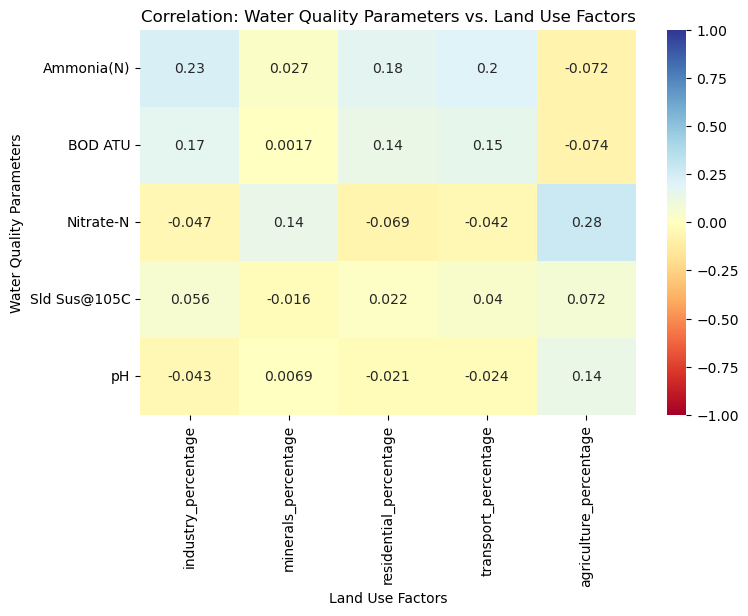

In [35]:
# Define your columns of interest
param_cols = ["Ammonia(N)", "BOD ATU", "Nitrate-N", "Sld Sus@105C", "pH"]
land_cols = ["industry_percentage", "minerals_percentage", "residential_percentage", 
             "transport_percentage", "agriculture_percentage"]

# Subset the DataFrame to just these columns
subset_cols = param_cols + land_cols
df_subset = merged_no_outliers[subset_cols].dropna()

# Compute the correlation matrix for the subset
corr_full = df_subset.corr()

# Slice the correlation matrix to keep only rows from parameters and columns from land use
corr_param_land = corr_full.loc[param_cols, land_cols]

# Focusing on water quality parameters
plt.figure(figsize=(8, 5))

# Choose a color map
sns.heatmap(
    corr_param_land,
    annot=True,
    cmap="RdYlBu",
    vmin=-1, vmax=1
)

plt.title("Correlation: Water Quality Parameters vs. Land Use Factors")
plt.xlabel("Land Use Factors")
plt.ylabel("Water Quality Parameters")
plt.show()

## Scatter Plots 

In [36]:
factors = ['industry_percentage', 'minerals_percentage', 'residential_percentage', 'transport_percentage', 'agriculture_percentage']

In [37]:
largest_values = {}
smallest_values = {}

for factor in factors:
    largest_values[factor] = merged_no_outliers.nlargest(500, factor, keep='first')
    smallest_values[factor] = merged_no_outliers.nsmallest(500, factor, keep='first')


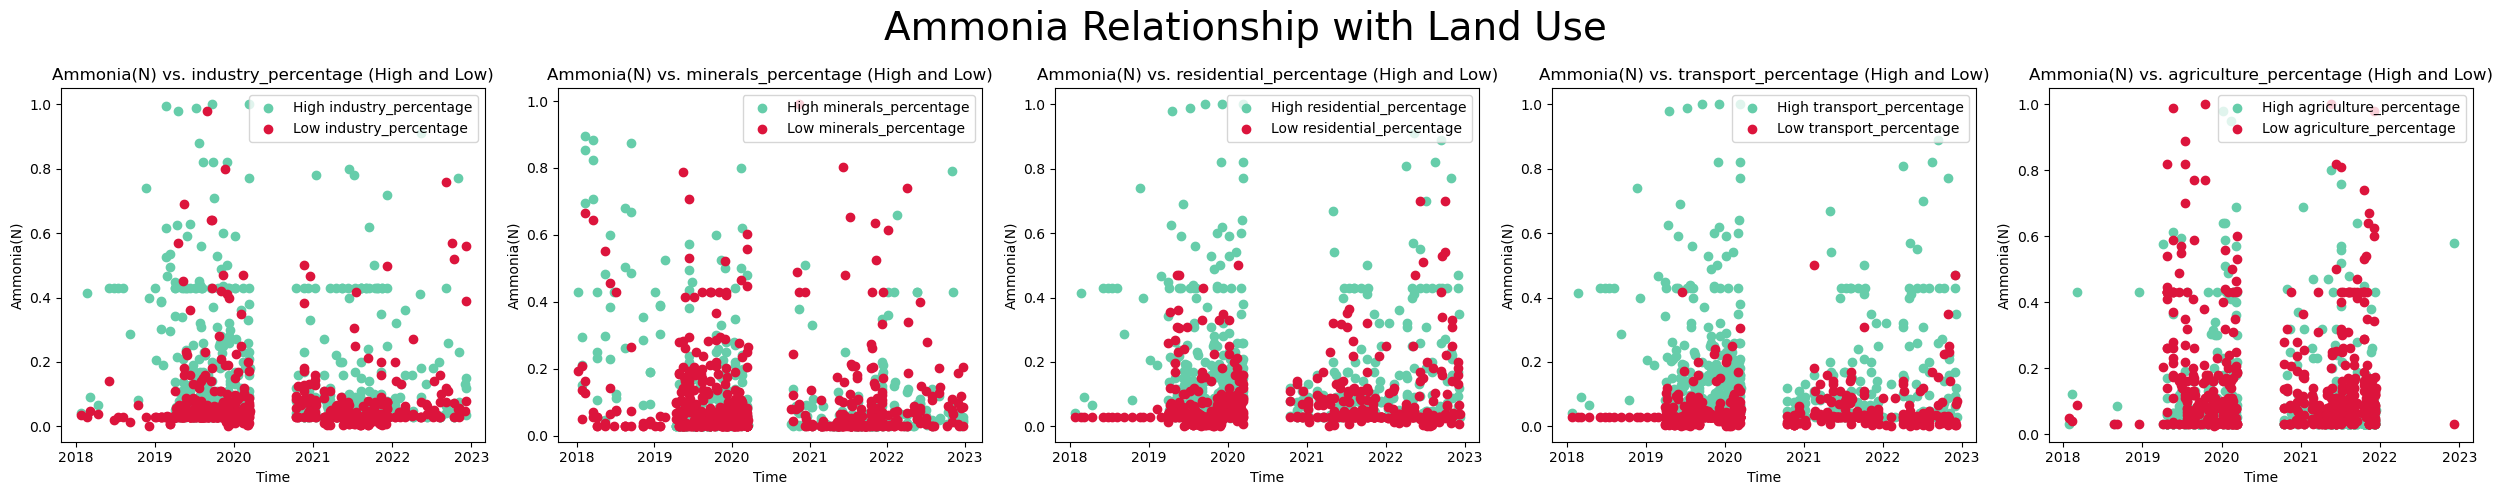

In [38]:
# Create subplots with fewer rows but more columns for side-by-side placement
ncols = len(factors)  # Number of columns is equal to the number of factors
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(5 * ncols, 5))

# Ensure axes is iterable (if only one subplot, axes is not a list)
axes = axes if isinstance(axes, np.ndarray) else [axes]

# Loop through the factors to create each subplot
for i, factor in enumerate(factors):
    ax = axes[i]

    # "Ammonia(N)" values when factor is high vs. low
    ammonia_high = largest_values[factor]["Ammonia(N)"].values
    ammonia_low = smallest_values[factor]["Ammonia(N)"].values

    time = largest_values[factor]["sample_date_time"].values  
    # Scatter plot for both high and low values together
    ax.scatter(time, ammonia_high, color='mediumaquamarine', label='High ' + factor)
    ax.scatter(time, ammonia_low, color='crimson', label='Low ' + factor)

    ax.set_title(f"Ammonia(N) vs. {factor} (High and Low)")
    ax.set_xlabel("Time")
    ax.set_ylabel("Ammonia(N)")
    ax.legend()
fig.suptitle('Ammonia Relationship with Land Use', fontsize=28)
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


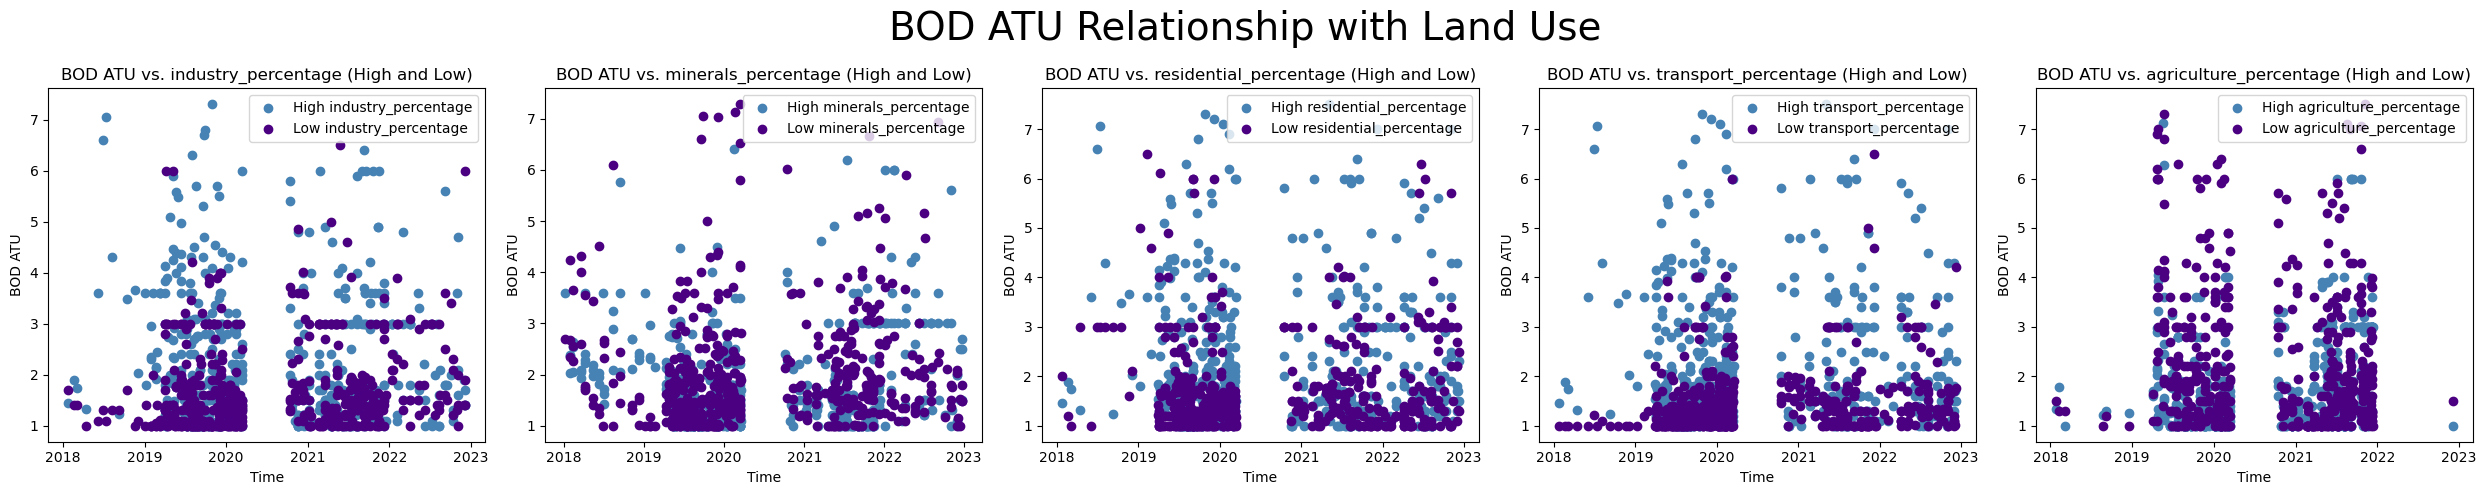

In [39]:
# Create subplots with fewer rows but more columns for side-by-side placement
ncols = len(factors)  # Number of columns is equal to the number of factors
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(5 * ncols, 5))

# Ensure axes is iterable (if only one subplot, axes is not a list)
axes = axes if isinstance(axes, np.ndarray) else [axes]

# Loop through the factors to create each subplot
for i, factor in enumerate(factors):
    ax = axes[i]

    # "BOD ATU" values when factor is high vs. low
    BOD_high = largest_values[factor]["BOD ATU"].values
    BOD_low = smallest_values[factor]["BOD ATU"].values

    # Corresponding time for the x-axis (using the same time for high and low)
    time = largest_values[factor]["sample_date_time"].values  
    
    # Scatter plot for both high and low values together
    ax.scatter(time, BOD_high, color='steelblue', label='High ' + factor)
    ax.scatter(time, BOD_low, color='indigo', label='Low ' + factor)

    ax.set_title(f"BOD ATU vs. {factor} (High and Low)")
    ax.set_xlabel("Time")
    ax.set_ylabel("BOD ATU")
    ax.legend()
fig.suptitle('BOD ATU Relationship with Land Use', fontsize=28)
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


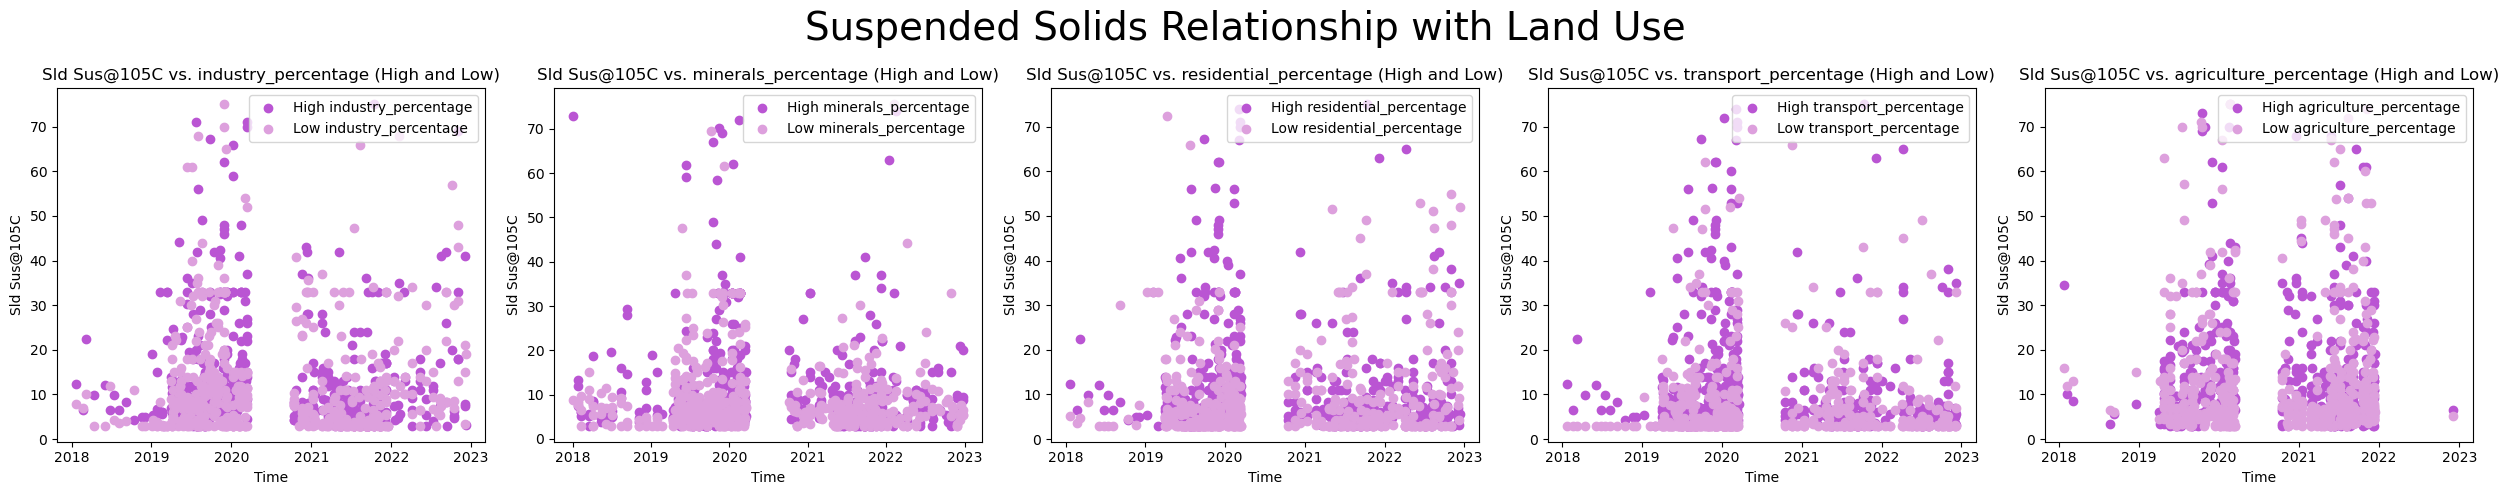

In [40]:
import matplotlib.pyplot as plt

# Create subplots with fewer rows but more columns for side-by-side placement
ncols = len(factors)  # Number of columns is equal to the number of factors
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(5 * ncols, 5))

# Ensure axes is iterable (if only one subplot, axes is not a list)
axes = axes if isinstance(axes, np.ndarray) else [axes]

# Loop through the factors to create each subplot
for i, factor in enumerate(factors):
    ax = axes[i]

    # "Sld Sus@105C" values for both high and low
    solids_high = largest_values[factor]["Sld Sus@105C"].values
    solids_low = smallest_values[factor]["Sld Sus@105C"].values

    # Corresponding time for the x-axis (using the same time for high and low)
    time = largest_values[factor]["sample_date_time"].values  
    
    # Scatter plot for both high and low values together
    ax.scatter(time, solids_high, color='mediumorchid', label='High ' + factor)
    ax.scatter(time, solids_low, color='plum', label='Low ' + factor)

    ax.set_title(f"Sld Sus@105C vs. {factor} (High and Low)")
    ax.set_xlabel("Time")
    ax.set_ylabel("Sld Sus@105C")
    ax.legend()
fig.suptitle('Suspended Solids Relationship with Land Use', fontsize=28)
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


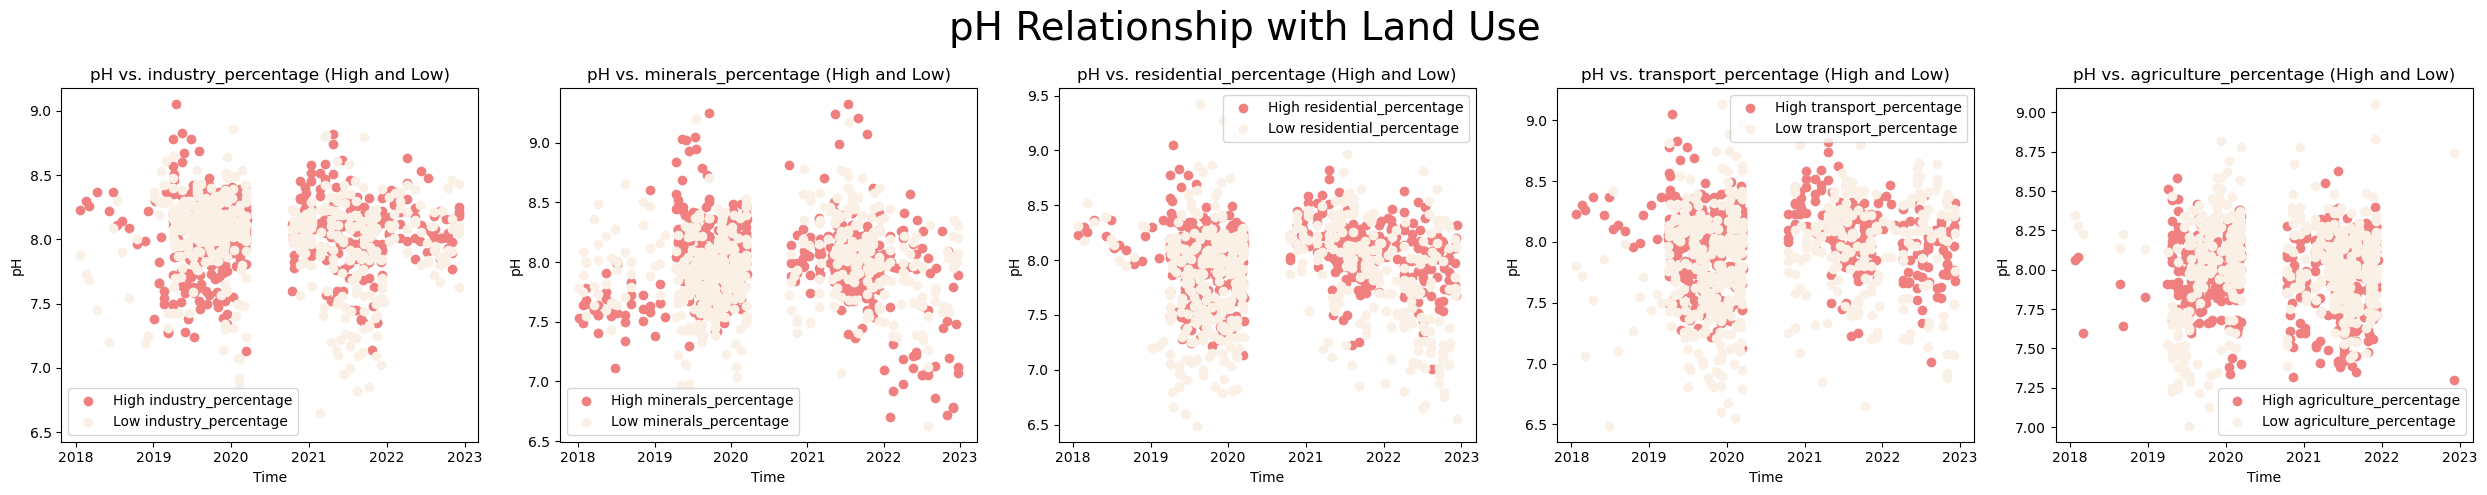

In [41]:
# Create subplots with fewer rows but more columns for side-by-side placement
ncols = len(factors)  # Number of columns is equal to the number of factors
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(5 * ncols, 5))

# Ensure axes is iterable (if only one subplot, axes is not a list)
axes = axes if isinstance(axes, np.ndarray) else [axes]

# Loop through the factors to create each subplot
for i, factor in enumerate(factors):
    ax = axes[i]

    # "pH" values when factor is high vs. low
    ph_high = largest_values[factor]["pH"].values
    ph_low = smallest_values[factor]["pH"].values

    # Corresponding time for the x-axis (using the same time for high and low)
    time = largest_values[factor]["sample_date_time"].values  
    
    # Scatter plot for both high and low values together
    ax.scatter(time, ph_high, color='lightcoral', label='High ' + factor)
    ax.scatter(time, ph_low, color='linen', label='Low ' + factor)

    ax.set_title(f"pH vs. {factor} (High and Low)")
    ax.set_xlabel("Time")
    ax.set_ylabel("pH")
    ax.legend()
fig.suptitle('pH Relationship with Land Use', fontsize=28)
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


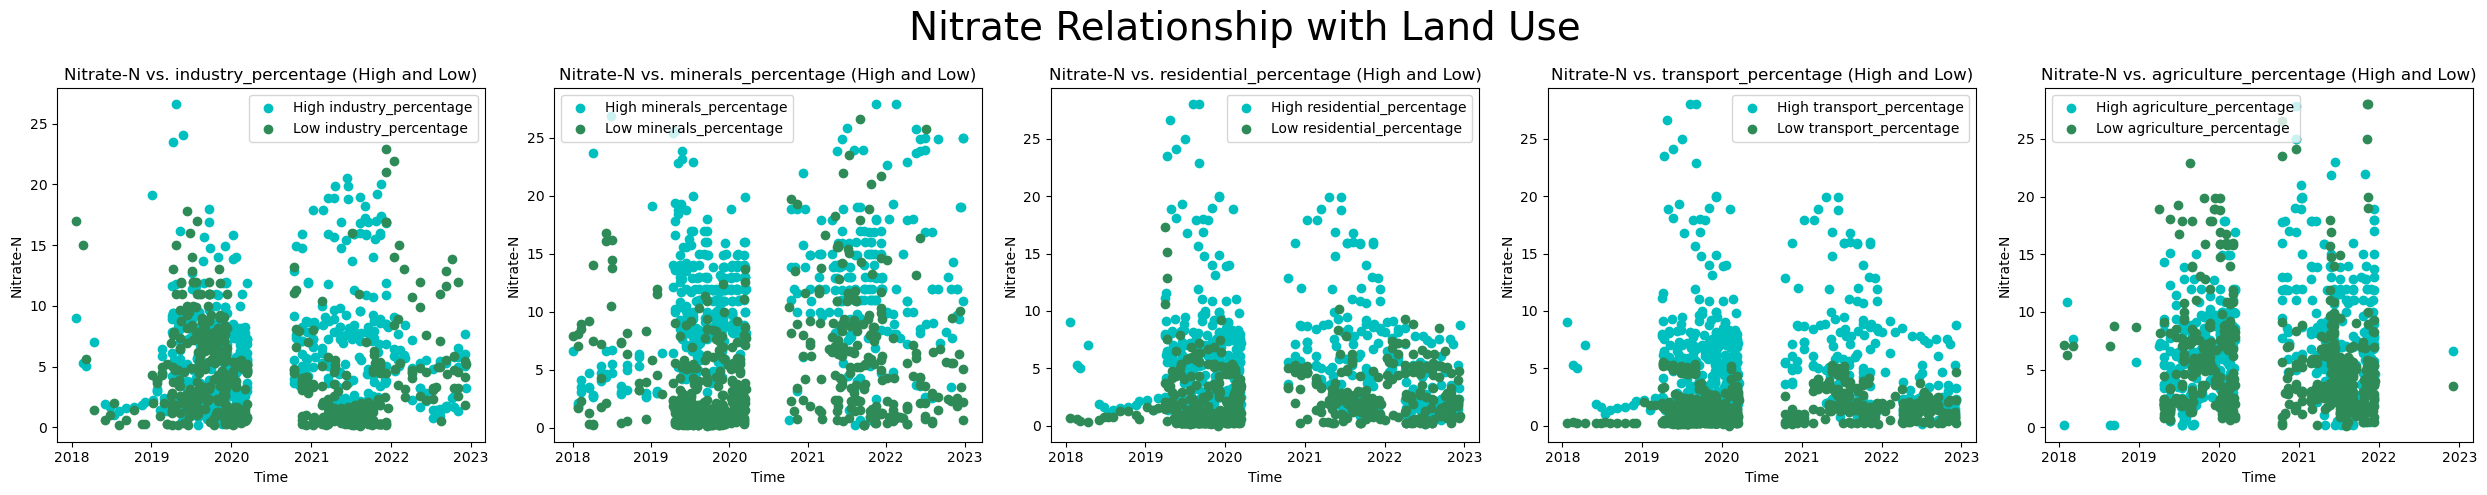

In [42]:
# Create subplots with fewer rows but more columns for side-by-side placement
ncols = len(factors)  # Number of columns is equal to the number of factors
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(5 * ncols, 5))

# Ensure axes is iterable (if only one subplot, axes is not a list)
axes = axes if isinstance(axes, np.ndarray) else [axes]

# Loop through the factors to create each subplot
for i, factor in enumerate(factors):
    ax = axes[i]

    # Extract "Nitrate-N" values when factor is high vs. low
    nitrate_high = largest_values[factor]["Nitrate-N"].values
    nitrate_low = smallest_values[factor]["Nitrate-N"].values

    # Corresponding time for the x-axis (using the same time for high and low)
    time = largest_values[factor]["sample_date_time"].values  
    
    # Scatter plot for both high and low values together
    ax.scatter(time, nitrate_high, color='c', label='High ' + factor)
    ax.scatter(time, nitrate_low, color='seagreen', label='Low ' + factor)

    ax.set_title(f"Nitrate-N vs. {factor} (High and Low)")
    ax.set_xlabel("Time")
    ax.set_ylabel("Nitrate-N")
    ax.legend()
fig.suptitle('Nitrate Relationship with Land Use', fontsize=28)
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


In [43]:
gdf_sampling_points = gpd.GeoDataFrame(
    df_ammonia, 
    geometry=gpd.points_from_xy(df_ammonia['northing'], df_ammonia['easting']),
    crs="EPSG:27700" 
)
gdf_sampling_points.head()

Unnamed: 0  compliance    sample_date_time  northing  easting  \
142760     1499904       False 2014-01-01 00:02:00    519048   359677   
30964       385139       False 2014-01-02 07:48:00    288663   632717   
58953       648258       False 2014-01-02 07:59:00    343100   461500   
220370     2373922       False 2014-01-02 08:02:00    208575   435140   
58902       648155       False 2014-01-02 08:06:00    341994   462172   

       determinand_label           determinand_def  result determinand_unit  \
142760        Ammonia(N)  Ammoniacal Nitrogen as N   0.030             mg/l   
30964         Ammonia(N)  Ammoniacal Nitrogen as N   0.072             mg/l   
58953         Ammonia(N)  Ammoniacal Nitrogen as N   0.519             mg/l   
220370        Ammonia(N)  Ammoniacal Nitrogen as N   0.648             mg/l   
58902         Ammonia(N)  Ammoniacal Nitrogen as N   0.500             mg/l   

                          sample_type  year  rolling_avg  \
142760  RIVER / RUNNING SURFACE WATER  2014      0.03000   
30964   RIVER / RUNNING SURFACE WATER  2014      0.05100   
58953   RIVER / RUNNING SURFACE WATER  2014      0.20700   
220370  RIVER / RUNNING SURFACE WATER  2014      0.31725   
58902   RIVER / RUNNING SURFACE WATER  2014      0.35380   

                     geometry  
142760  POINT (519048 359677)  
30964   POINT (288663 632717)  
58953   POINT (343100 461500)  
220370  POINT (208575 435140)  
58902   POINT (341994 462172)

In [44]:
# convert sampling points into a gdf with Point geometries
gdf_sampling_points['geometry'] = gdf_sampling_points.apply(
    lambda row: Point(row['easting'], row['northing']), axis=1
)

# convert to gdf and set CRS to British National Grid (EPSG:27700)
gdf_sampling_points = gpd.GeoDataFrame(gdf_sampling_points, geometry='geometry', crs="EPSG:27700")
boundaries = boundaries.to_crs("EPSG:27700")  

# perform spatial join to assign each sampling point to a Local Authority
gdf_classified = gpd.sjoin(gdf_sampling_points, boundaries[['LAD22NM', 'geometry']], how="left", predicate="within")

# keep only relevant columns
gdf_classified = gdf_classified[['sample_date_time', 'northing', 'easting', 'LAD22NM', 'determinand_label',	'determinand_def',	'result',	'determinand_unit',	'sample_type',	'year']]


In [45]:
# merge land use data with local authority boundaries
merge = boundaries.merge(gdf_classified, left_on="LAD22NM", right_on="LAD22NM")
merge.shape

(445740, 18)

/opt/anaconda3/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


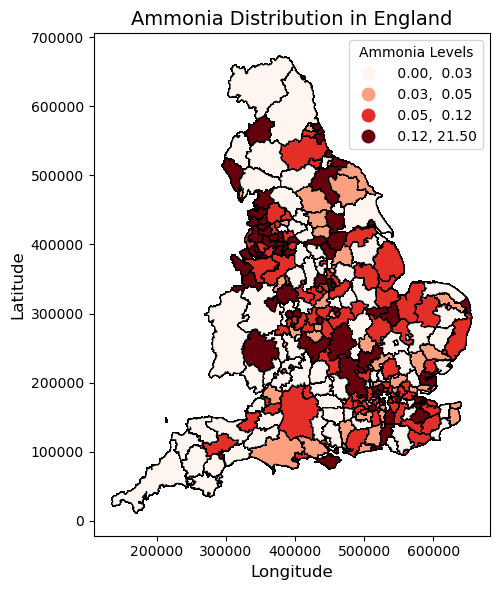

In [46]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ammonia levels with better clarity and handling
merge.plot(
    column="result",
    cmap="Reds",          # Darker green means higher ammonia
    linewidth=0.8,
    legend=True,            # Adds color scale (colorbar)
    scheme="quantiles",     # Categorize using quantiles
    ax=ax,
    edgecolor="black"       # Adds clear region borders
)

# Set title and labels
ax.set_title("Ammonia Distribution in England", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Improve legend position if needed
leg = ax.get_legend()
leg.set_title("Ammonia Levels")

# Display the plot
plt.tight_layout()
plt.show()


In [47]:
gdf_sampling_points = gpd.GeoDataFrame(
    df_bod, 
    geometry=gpd.points_from_xy(df_bod['northing'], df_bod['easting']),
    crs="EPSG:27700" 
)
gdf_sampling_points.head()

Unnamed: 0  compliance    sample_date_time  northing  easting  \
30963       385138       False 2014-01-02 07:48:00    288663   632717   
58952       648256       False 2014-01-02 07:59:00    343100   461500   
58906       648162       False 2014-01-02 08:06:00    341994   462172   
58782       647898       False 2014-01-02 08:12:00    341877   462258   
220509     2374582       False 2014-01-02 08:30:00    208900   435383   

       determinand_label  determinand_def  result determinand_unit  \
30963            BOD ATU  BOD : 5 Day ATU    1.00             mg/l   
58952            BOD ATU  BOD : 5 Day ATU    1.66             mg/l   
58906            BOD ATU  BOD : 5 Day ATU    1.20             mg/l   
58782            BOD ATU  BOD : 5 Day ATU    2.06             mg/l   
220509           BOD ATU  BOD : 5 Day ATU    1.00             mg/l   

                          sample_type  year  rolling_avg  \
30963   RIVER / RUNNING SURFACE WATER  2014     1.000000   
58952   RIVER / RUNNING SURFACE WATER  2014     1.330000   
58906   RIVER / RUNNING SURFACE WATER  2014     1.286667   
58782   RIVER / RUNNING SURFACE WATER  2014     1.480000   
220509  RIVER / RUNNING SURFACE WATER  2014     1.384000   

                     geometry  
30963   POINT (288663 632717)  
58952   POINT (343100 461500)  
58906   POINT (341994 462172)  
58782   POINT (341877 462258)  
220509  POINT (208900 435383)

In [48]:
# convert sampling points into a gdf with Point geometries
gdf_sampling_points['geometry'] = gdf_sampling_points.apply(
    lambda row: Point(row['easting'], row['northing']), axis=1
)

# convert to gdf and set CRS to British National Grid (EPSG:27700)
gdf_sampling_points = gpd.GeoDataFrame(gdf_sampling_points, geometry='geometry', crs="EPSG:27700")
boundaries = boundaries.to_crs("EPSG:27700")  

# perform spatial join to assign each sampling point to a Local Authority
gdf_classified = gpd.sjoin(gdf_sampling_points, boundaries[['LAD22NM', 'geometry']], how="left", predicate="within")

# keep only relevant columns
gdf_classified = gdf_classified[['sample_date_time', 'northing', 'easting', 'LAD22NM', 'determinand_label',	'determinand_def',	'result',	'determinand_unit',	'sample_type',	'year']]


In [49]:
# merge land use data with local authority boundaries
merge = boundaries.merge(gdf_classified, left_on="LAD22NM", right_on="LAD22NM")
merge.shape

(94754, 18)

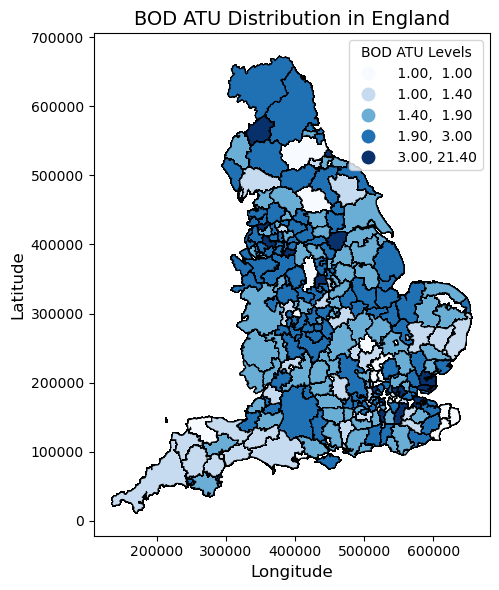

In [50]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ammonia levels with better clarity and handling
merge.plot(
    column="result",
    cmap="Blues",          # Darker green means higher ammonia
    linewidth=0.8,
    legend=True,            # Adds color scale (colorbar)
    scheme="quantiles",     # Categorize using quantiles
    ax=ax,
    edgecolor="black"       # Adds clear region borders
)

# Set title and labels
ax.set_title("BOD ATU Distribution in England", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Improve legend position if needed
leg = ax.get_legend()
leg.set_title("BOD ATU Levels")

# Display the plot
plt.tight_layout()
plt.show()


In [51]:
gdf_sampling_points = gpd.GeoDataFrame(
    df_ss, 
    geometry=gpd.points_from_xy(df_ss['northing'], df_ss['easting']),
    crs="EPSG:27700" 
)
gdf_sampling_points.head()

Unnamed: 0  compliance    sample_date_time  northing  easting  \
142761     1499905       False 2014-01-01 00:02:00    519048   359677   
30965       385143       False 2014-01-02 07:48:00    288663   632717   
220372     2373928       False 2014-01-02 08:02:00    208575   435140   
58905       648161       False 2014-01-02 08:06:00    341994   462172   
58785       647902       False 2014-01-02 08:12:00    341877   462258   

       determinand_label             determinand_def  result determinand_unit  \
142761      Sld Sus@105C  Solids, Suspended at 105 C    6.17             mg/l   
30965       Sld Sus@105C  Solids, Suspended at 105 C   18.10             mg/l   
220372      Sld Sus@105C  Solids, Suspended at 105 C    8.63             mg/l   
58905       Sld Sus@105C  Solids, Suspended at 105 C   12.70             mg/l   
58785       Sld Sus@105C  Solids, Suspended at 105 C   12.60             mg/l   

                          sample_type  year  rolling_avg  \
142761  RIVER / RUNNING SURFACE WATER  2014     6.170000   
30965   RIVER / RUNNING SURFACE WATER  2014    12.135000   
220372  RIVER / RUNNING SURFACE WATER  2014    10.966667   
58905   RIVER / RUNNING SURFACE WATER  2014    11.400000   
58785   RIVER / RUNNING SURFACE WATER  2014    11.640000   

                     geometry  
142761  POINT (519048 359677)  
30965   POINT (288663 632717)  
220372  POINT (208575 435140)  
58905   POINT (341994 462172)  
58785   POINT (341877 462258)

In [52]:
# convert sampling points into a gdf with Point geometries
gdf_sampling_points['geometry'] = gdf_sampling_points.apply(
    lambda row: Point(row['easting'], row['northing']), axis=1
)

# convert to gdf and set CRS to British National Grid (EPSG:27700)
gdf_sampling_points = gpd.GeoDataFrame(gdf_sampling_points, geometry='geometry', crs="EPSG:27700")
boundaries = boundaries.to_crs("EPSG:27700")  

# perform spatial join to assign each sampling point to a Local Authority
gdf_classified = gpd.sjoin(gdf_sampling_points, boundaries[['LAD22NM', 'geometry']], how="left", predicate="within")

# keep only relevant columns
gdf_classified = gdf_classified[['sample_date_time', 'northing', 'easting', 'LAD22NM', 'determinand_label',	'determinand_def',	'result',	'determinand_unit',	'sample_type',	'year']]


In [53]:
# merge land use data with local authority boundaries
merge = boundaries.merge(gdf_classified, left_on="LAD22NM", right_on="LAD22NM")
merge.shape

(167422, 18)

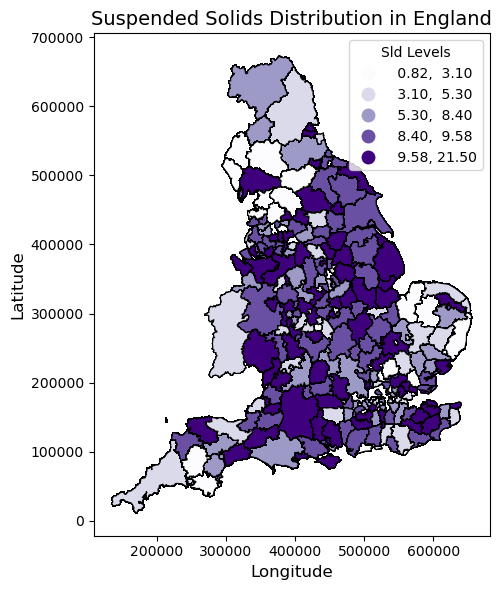

In [54]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ammonia levels with better clarity and handling
merge.plot(
    column="result",
    cmap="Purples",          # Darker green means higher ammonia
    linewidth=0.8,
    legend=True,            # Adds color scale (colorbar)
    scheme="quantiles",     # Categorize using quantiles
    ax=ax,
    edgecolor="black"       # Adds clear region borders
)

# Set title and labels
ax.set_title("Suspended Solids Distribution in England", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Improve legend position if needed
leg = ax.get_legend()
leg.set_title("Sld Levels")

# Display the plot
plt.tight_layout()
plt.show()

In [55]:
gdf_sampling_points = gpd.GeoDataFrame(
    df_nitrate, 
    geometry=gpd.points_from_xy(df_nitrate['northing'], df_nitrate['easting']),
    crs="EPSG:27700" 
)
gdf_sampling_points.head()

Unnamed: 0  compliance    sample_date_time  northing  easting  \
142759     1499902       False 2014-01-01 00:02:00    519048   359677   
30962       385131       False 2014-01-02 07:48:00    288663   632717   
220373     2373929       False 2014-01-02 08:02:00    208575   435140   
58904       648158       False 2014-01-02 08:06:00    341994   462172   
88250      1013809       False 2014-01-02 08:12:00    516465   431650   

       determinand_label determinand_def  result determinand_unit  \
142759         Nitrate-N    Nitrate as N    1.59             mg/l   
30962          Nitrate-N    Nitrate as N   12.40             mg/l   
220373         Nitrate-N    Nitrate as N    7.22             mg/l   
58904          Nitrate-N    Nitrate as N    4.57             mg/l   
88250          Nitrate-N    Nitrate as N    4.69             mg/l   

                          sample_type  year  rolling_avg  \
142759  RIVER / RUNNING SURFACE WATER  2014        1.590   
30962   RIVER / RUNNING SURFACE WATER  2014        6.995   
220373  RIVER / RUNNING SURFACE WATER  2014        7.070   
58904   RIVER / RUNNING SURFACE WATER  2014        6.445   
88250   RIVER / RUNNING SURFACE WATER  2014        6.094   

                     geometry  
142759  POINT (519048 359677)  
30962   POINT (288663 632717)  
220373  POINT (208575 435140)  
58904   POINT (341994 462172)  
88250   POINT (516465 431650)

In [56]:
# convert sampling points into a gdf with Point geometries
gdf_sampling_points['geometry'] = gdf_sampling_points.apply(
    lambda row: Point(row['easting'], row['northing']), axis=1
)

# convert to gdf and set CRS to British National Grid (EPSG:27700)
gdf_sampling_points = gpd.GeoDataFrame(gdf_sampling_points, geometry='geometry', crs="EPSG:27700")
boundaries = boundaries.to_crs("EPSG:27700")  

# perform spatial join to assign each sampling point to a Local Authority
gdf_classified = gpd.sjoin(gdf_sampling_points, boundaries[['LAD22NM', 'geometry']], how="left", predicate="within")

# keep only relevant columns
gdf_classified = gdf_classified[['sample_date_time', 'northing', 'easting', 'LAD22NM', 'determinand_label',	'determinand_def',	'result',	'determinand_unit',	'sample_type',	'year']]


In [57]:
# merge land use data with local authority boundaries
merge = boundaries.merge(gdf_classified, left_on="LAD22NM", right_on="LAD22NM")
merge.shape

(428187, 18)

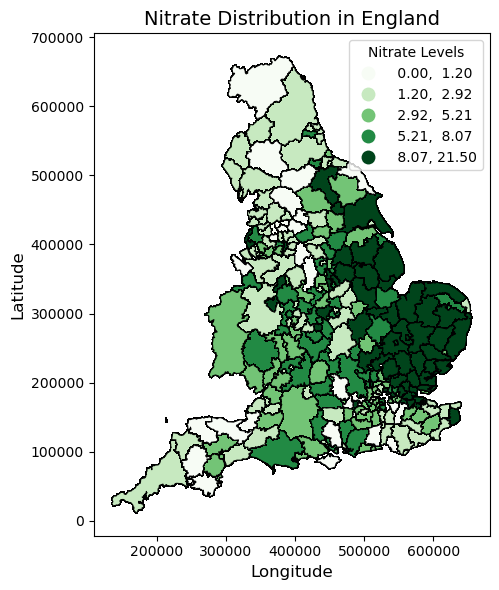

In [58]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ammonia levels with better clarity and handling
merge.plot(
    column="result",
    cmap="Greens",          # Darker green means higher ammonia
    linewidth=0.8,
    legend=True,            # Adds color scale (colorbar)
    scheme="quantiles",     # Categorize using quantiles
    ax=ax,
    edgecolor="black"       # Adds clear region borders
)

# Set title and labels
ax.set_title("Nitrate Distribution in England", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Improve legend position if needed
leg = ax.get_legend()
leg.set_title("Nitrate Levels")

# Display the plot
plt.tight_layout()
plt.show()

In [59]:
gdf_sampling_points = gpd.GeoDataFrame(
    df_ph, 
    geometry=gpd.points_from_xy(df_ph['northing'], df_ph['easting']),
    crs="EPSG:27700" 
)
gdf_sampling_points.head()

Unnamed: 0  compliance    sample_date_time  northing  easting  \
30966       385146       False 2014-01-02 07:48:00    288663   632717   
220371     2373924       False 2014-01-02 08:02:00    208575   435140   
58903       648156       False 2014-01-02 08:06:00    341994   462172   
58784       647900       False 2014-01-02 08:12:00    341877   462258   
88251      1013812       False 2014-01-02 08:12:00    516465   431650   

       determinand_label determinand_def  result determinand_unit  \
30966                 pH              pH    8.02          phunits   
220371                pH              pH    7.47          phunits   
58903                 pH              pH    8.03          phunits   
58784                 pH              pH    7.81          phunits   
88251                 pH              pH    8.00          phunits   

                          sample_type  year  rolling_avg  \
30966   RIVER / RUNNING SURFACE WATER  2014       8.0200   
220371  RIVER / RUNNING SURFACE WATER  2014       7.7450   
58903   RIVER / RUNNING SURFACE WATER  2014       7.8400   
58784   RIVER / RUNNING SURFACE WATER  2014       7.8325   
88251   RIVER / RUNNING SURFACE WATER  2014       7.8660   

                     geometry  
30966   POINT (288663 632717)  
220371  POINT (208575 435140)  
58903   POINT (341994 462172)  
58784   POINT (341877 462258)  
88251   POINT (516465 431650)

In [60]:
# convert sampling points into a gdf with Point geometries
gdf_sampling_points['geometry'] = gdf_sampling_points.apply(
    lambda row: Point(row['easting'], row['northing']), axis=1
)

# convert to gdf and set CRS to British National Grid (EPSG:27700)
gdf_sampling_points = gpd.GeoDataFrame(gdf_sampling_points, geometry='geometry', crs="EPSG:27700")
boundaries = boundaries.to_crs("EPSG:27700")  

# perform spatial join to assign each sampling point to a Local Authority
gdf_classified = gpd.sjoin(gdf_sampling_points, boundaries[['LAD22NM', 'geometry']], how="left", predicate="within")

# keep only relevant columns
gdf_classified = gdf_classified[['sample_date_time', 'northing', 'easting', 'LAD22NM', 'determinand_label',	'determinand_def',	'result',	'determinand_unit',	'sample_type',	'year']]


In [61]:
# merge land use data with local authority boundaries
merge = boundaries.merge(gdf_classified, left_on="LAD22NM", right_on="LAD22NM")
merge.shape

(440065, 18)

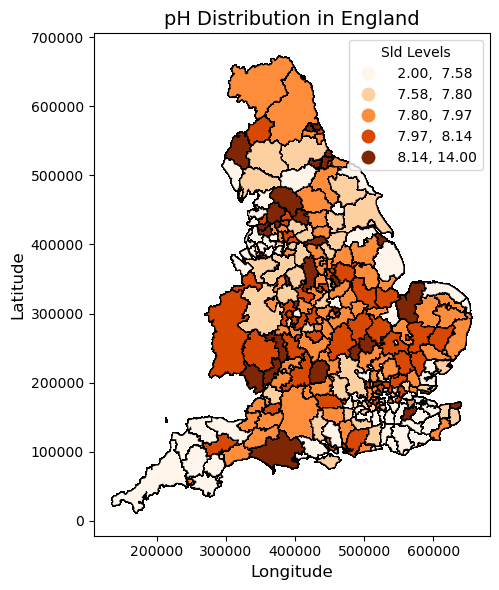

In [62]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ammonia levels with better clarity and handling
merge.plot(
    column="result",
    cmap="Oranges",          # Darker green means higher ammonia
    linewidth=0.8,
    legend=True,            # Adds color scale (colorbar)
    scheme="quantiles",     # Categorize using quantiles
    ax=ax,
    edgecolor="black"       # Adds clear region borders
)

# Set title and labels
ax.set_title("pH Distribution in England", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Improve legend position if needed
leg = ax.get_legend()
leg.set_title("Sld Levels")

# Display the plot
plt.tight_layout()
plt.show()

In [63]:

#handle object dtypes that are supposed to be numeric
columns= ['industry_and_commerce_total', 'landfill_and_waste_disposal', 'minerals_and_mining', 'minerals_and_landfill_total', 'residential', 'residential_total', 'highways_and_road_transport', 'transport_other', 'utilities', 'transport_and_utilities_total', 'agricultural_buildings', 'agricultural_land', 'agriculture_total', 'grand_total'] 
for column in columns:
    landuse[column] = landuse[column].astype(str).str.strip()
    landuse[column] = landuse[column].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    landuse[column] = pd.to_numeric(landuse[column])

In [64]:
landuse.head()

year local_authority_name  centre_northing  centre_easting  \
0  2022                 Adur           106327          520029   
1  2022            Allerdale           536044          318683   
2  2022         Amber Valley           349640          436568   
3  2022                 Arun           105690          501100   
4  2022             Ashfield           355822          450067   

                     area  industry  offices  retail  storage_and_warehousing  \
0  Solent and South Downs      12.0      4.0    10.0                      8.0   
1  Cumbria and Lancashire      73.0      9.0    26.0                     27.0   
2           East Midlands      23.0      8.0    64.0                     53.0   
3  Solent and South Downs      27.0      6.0    30.0                     20.0   
4           East Midlands     103.0     10.0    24.0                     52.0   

   industry_and_commerce_total  ...  residential  residential_total  \
0                         34.0  ...        189.0              190.0   
1                        135.0  ...        391.0              411.0   
2                        148.0  ...        415.0              424.0   
3                         83.0  ...        569.0              584.0   
4                        189.0  ...        362.0              372.0   

   highways_and_road_transport  transport_other  utilities  \
0                        308.0            149.0        7.0   
1                       2617.0            299.0       71.0   
2                       1013.0            114.0       17.0   
3                       1165.0             80.0       87.0   
4                        729.0             40.0       47.0   

   transport_and_utilities_total  agricultural_buildings  agricultural_land  \
0                          465.0                     3.0             2129.0   
1                         2988.0                    38.0            69418.0   
2                         1144.0                    15.0            17644.0   
3                         1333.0                    27.0            12164.0   
4                          816.0                    13.0             4676.0   

   agriculture_total  grand_total  
0             2131.0       4207.0  
1            69456.0     125831.0  
2            17660.0      26544.0  
3            12191.0      22099.0  
4             4689.0      10956.0  

[5 rows x 24 columns]

In [65]:
landuse = landuse.drop([
              'offices', 
              'retail',
              'industry_and_commerce_total',
              'landfill_and_waste_disposal', 
              'minerals_and_landfill_total',
              'institutional_and_communal_accommodations',
              'residential',
              'utilities', 
              'transport_and_utilities_total', 
              'agricultural_buildings',
              'agricultural_land'], axis = 1)

In [66]:
landuse['minerals_and_mining'].fillna(0, inplace=True)

/var/folders/6f/hrr6km6x5l39n_12_r7994t00000gn/T/ipykernel_70504/1020587139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  landuse['minerals_and_mining'].fillna(0, inplace=True)


In [67]:
landuse.dropna(inplace=True)


In [68]:
print(landuse.isnull().sum())

year                           0
local_authority_name           0
centre_northing                0
centre_easting                 0
area                           0
industry                       0
storage_and_warehousing        0
minerals_and_mining            0
residential_total              0
highways_and_road_transport    0
transport_other                0
agriculture_total              0
grand_total                    0
dtype: int64


In [69]:
# Normalise factor columns
landuse['industry_total'] = landuse['industry'] + landuse['storage_and_warehousing']
landuse['transport_total'] = landuse['highways_and_road_transport'] + landuse['transport_other']

landuse['industry_percentage'] = (landuse['industry_total'] / landuse['grand_total']) * 100
landuse['minerals_percentage'] = (landuse['minerals_and_mining'] / landuse['grand_total']) * 100
landuse['residential_percentage'] = (landuse['residential_total'] / landuse['grand_total']) * 100
landuse['transport_percentage'] = (landuse['transport_total'] / landuse['grand_total']) * 100
landuse['agriculture_percentage'] = (landuse['agriculture_total'] / landuse['grand_total']) * 100


In [70]:
landuse = landuse.drop(['industry','storage_and_warehousing', 'minerals_and_mining', 'residential_total',
       'highways_and_road_transport', 'transport_other', 'agriculture_total',
       'grand_total', 'industry_total', 'transport_total'], axis = 1)

In [71]:
# merge land use data with local authority boundaries
land_and_local = boundaries.merge(landuse, left_on="LAD22NM", right_on="local_authority_name")

# check the merged data
print(land_and_local.head())

   FID    LAD22CD     LAD22NM   BNG_E   BNG_N     LONG       LAT  \
0    1  E06000001  Hartlepool  447160  531474 -1.27018  54.67614   
1    1  E06000001  Hartlepool  447160  531474 -1.27018  54.67614   
2    1  E06000001  Hartlepool  447160  531474 -1.27018  54.67614   
3    1  E06000001  Hartlepool  447160  531474 -1.27018  54.67614   
4    1  E06000001  Hartlepool  447160  531474 -1.27018  54.67614   

                               GlobalID  \
0  0c2caf9e-a186-4be5-81a1-ff4fcc433ee5   
1  0c2caf9e-a186-4be5-81a1-ff4fcc433ee5   
2  0c2caf9e-a186-4be5-81a1-ff4fcc433ee5   
3  0c2caf9e-a186-4be5-81a1-ff4fcc433ee5   
4  0c2caf9e-a186-4be5-81a1-ff4fcc433ee5   

                                            geometry  year  \
0  POLYGON ((448972.64 536746.425, 448985.072 536...  2022   
1  POLYGON ((448972.64 536746.425, 448985.072 536...  2021   
2  POLYGON ((448972.64 536746.425, 448985.072 536...  2020   
3  POLYGON ((448972.64 536746.425, 448985.072 536...  2019   
4  POLYGON ((448972.64

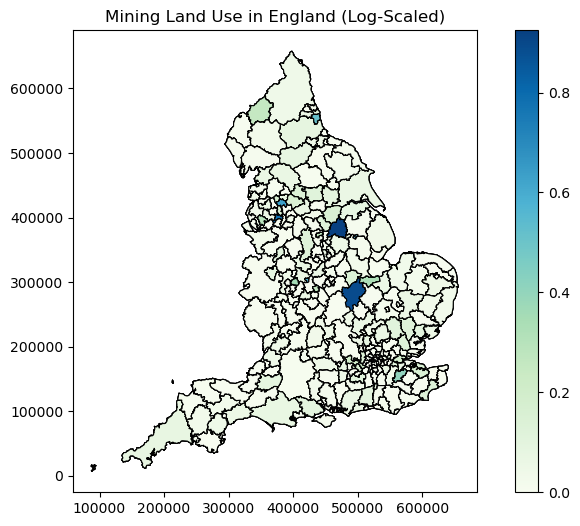

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation (adding a small constant to avoid log(0))
land_and_local['minerals_percentage_log'] = np.log1p(land_and_local['minerals_percentage'])

# Plot the log-transformed column with a legend
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot = land_and_local.plot(column="minerals_percentage_log", cmap="GnBu", linewidth=0.8, edgecolor="black", ax=ax, legend=True)

# Customize legend
leg = plot.get_legend()

plt.title("Mining Land Use in England (Log-Scaled)")
plt.show()


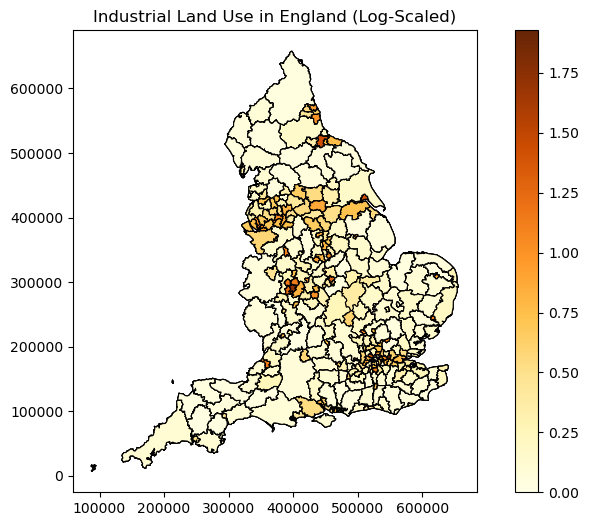

In [73]:
# Apply log transformation (adding a small constant to avoid log(0))
land_and_local['industry_percentage_log'] = np.log1p(land_and_local['industry_percentage'])

# Plot the log-transformed column with a legend
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot = land_and_local.plot(column="industry_percentage_log", cmap="YlOrBr", linewidth=0.8, edgecolor="black", ax=ax, legend=True)

# Customize the legend
leg = plot.get_legend()

# Add plot title
plt.title("Industrial Land Use in England (Log-Scaled)")

plt.show()


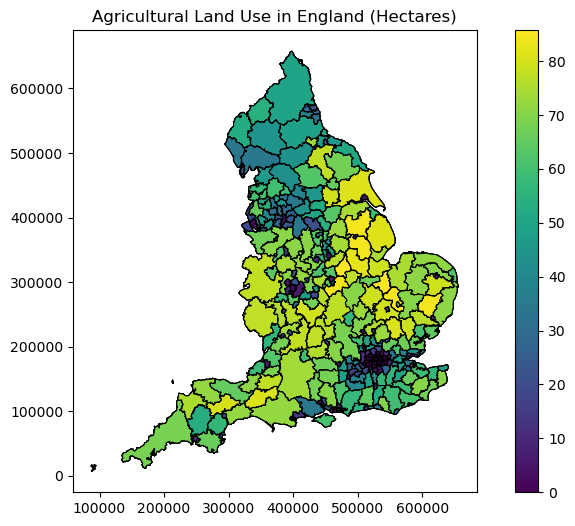

In [74]:
# Plot agricultural land use with a legend
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot = land_and_local.plot(column="agriculture_percentage", cmap="viridis", linewidth=0.8, edgecolor="black", ax=ax, legend=True)

# Customize the legend
leg = plot.get_legend()

# Add a plot title
plt.title("Agricultural Land Use in England (Hectares)")

plt.show()


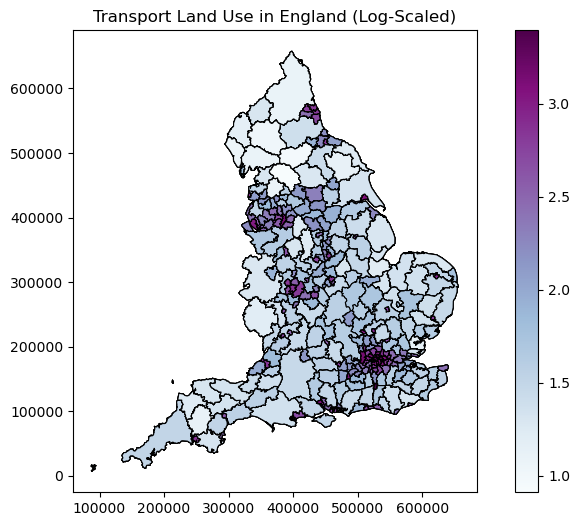

In [75]:
# Apply log transformation (adding a small constant to avoid log(0))
land_and_local['transport_percentage_log'] = np.log1p(land_and_local['transport_percentage'])

# Plot the log-transformed column with a legend
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot = land_and_local.plot(column="transport_percentage_log", cmap="BuPu", linewidth=0.8, edgecolor="black", ax=ax, legend=True)

# Customize the legend
leg = plot.get_legend()

# Add title and show plot
plt.title("Transport Land Use in England (Log-Scaled)")
plt.show()


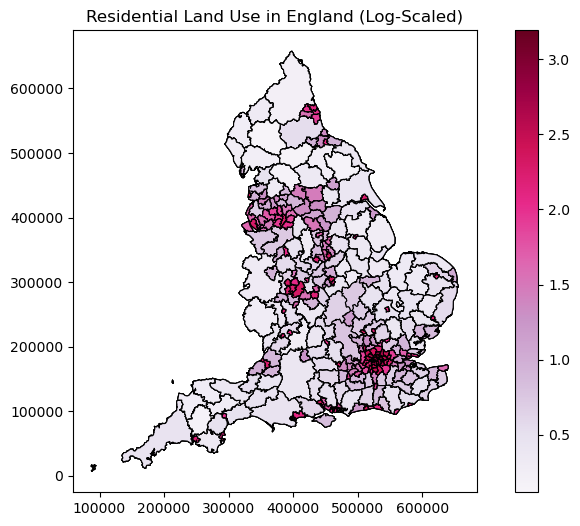

In [76]:
# Apply log transformation (adding a small constant to avoid log(0))
land_and_local['residential_percentage_log'] = np.log1p(land_and_local['residential_percentage'])

# Plot the log-transformed column with a legend
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot = land_and_local.plot(column="residential_percentage_log", cmap="PuRd", linewidth=0.8, edgecolor="black", ax=ax, legend=True)

# Customize the legend
leg = plot.get_legend()

# Add title and show plot
plt.title("Residential Land Use in England (Log-Scaled)")
plt.show()


In [77]:
# Convert 'sample_date_time' column to datetime dtype
water['sample_date_time'] = pd.to_datetime(water['sample_date_time'], errors='coerce')



In [78]:
# List of parameters to filter
parameters = ['Ammonia(N)', 'BOD ATU', 'Sld Sus@105C', 'Nitrate-N', 'pH']

# Create a dictionary to store DataFrames for each parameter
param_dfs = {param: water[water["determinand_label"] == param].copy() for param in parameters}

# Access individual DataFrames, e.g., param_dfs['Ammonia(N)']


In [79]:
# Function to identify outliers using the 0.1 and 0.9 percentiles
def find_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include='number').columns
    
    # Calculate Q1, Q3, and IQR for the specific parameter DataFrame
    Q1 = df[numeric_cols].quantile(0.1)  # 10th percentile
    Q3 = df[numeric_cols].quantile(0.9)  # 90th percentile
    IQR = Q3 - Q1                        # Interquartile range
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify rows where any numeric column is outside the bounds
    mask = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)
    
    # Return rows that are outliers
    return df[mask.any(axis=1)].copy()

# Create a new dictionary to store outlier DataFrames for each parameter
outlier_dfs = {param: find_outliers(param_dfs[param]) for param in parameters}

# Display the outlier DataFrames
for param, outlier_df in outlier_dfs.items():
    print(f"Outliers for {param}:")
    print(outlier_df.head(), "\n")


Outliers for Ammonia(N):
      Unnamed: 0  compliance    sample_date_time  northing  easting  \
918         3942       False 2014-02-12 13:45:00    243799   458736   
965         4103       False 2014-03-18 12:34:00    247101   468153   
981         4159       False 2014-07-11 11:20:00    247101   468153   
1302        6123       False 2014-11-07 10:48:00    225000   491700   
1417        6739       False 2014-05-19 10:33:00    240459   489163   

     determinand_label           determinand_def  result determinand_unit  \
918         Ammonia(N)  Ammoniacal Nitrogen as N   3.280             mg/l   
965         Ammonia(N)  Ammoniacal Nitrogen as N   2.160             mg/l   
981         Ammonia(N)  Ammoniacal Nitrogen as N   2.360             mg/l   
1302        Ammonia(N)  Ammoniacal Nitrogen as N   1.770             mg/l   
1417        Ammonia(N)  Ammoniacal Nitrogen as N   0.899             mg/l   

                        sample_type  year  
918   RIVER / RUNNING SURFACE WATER  2014

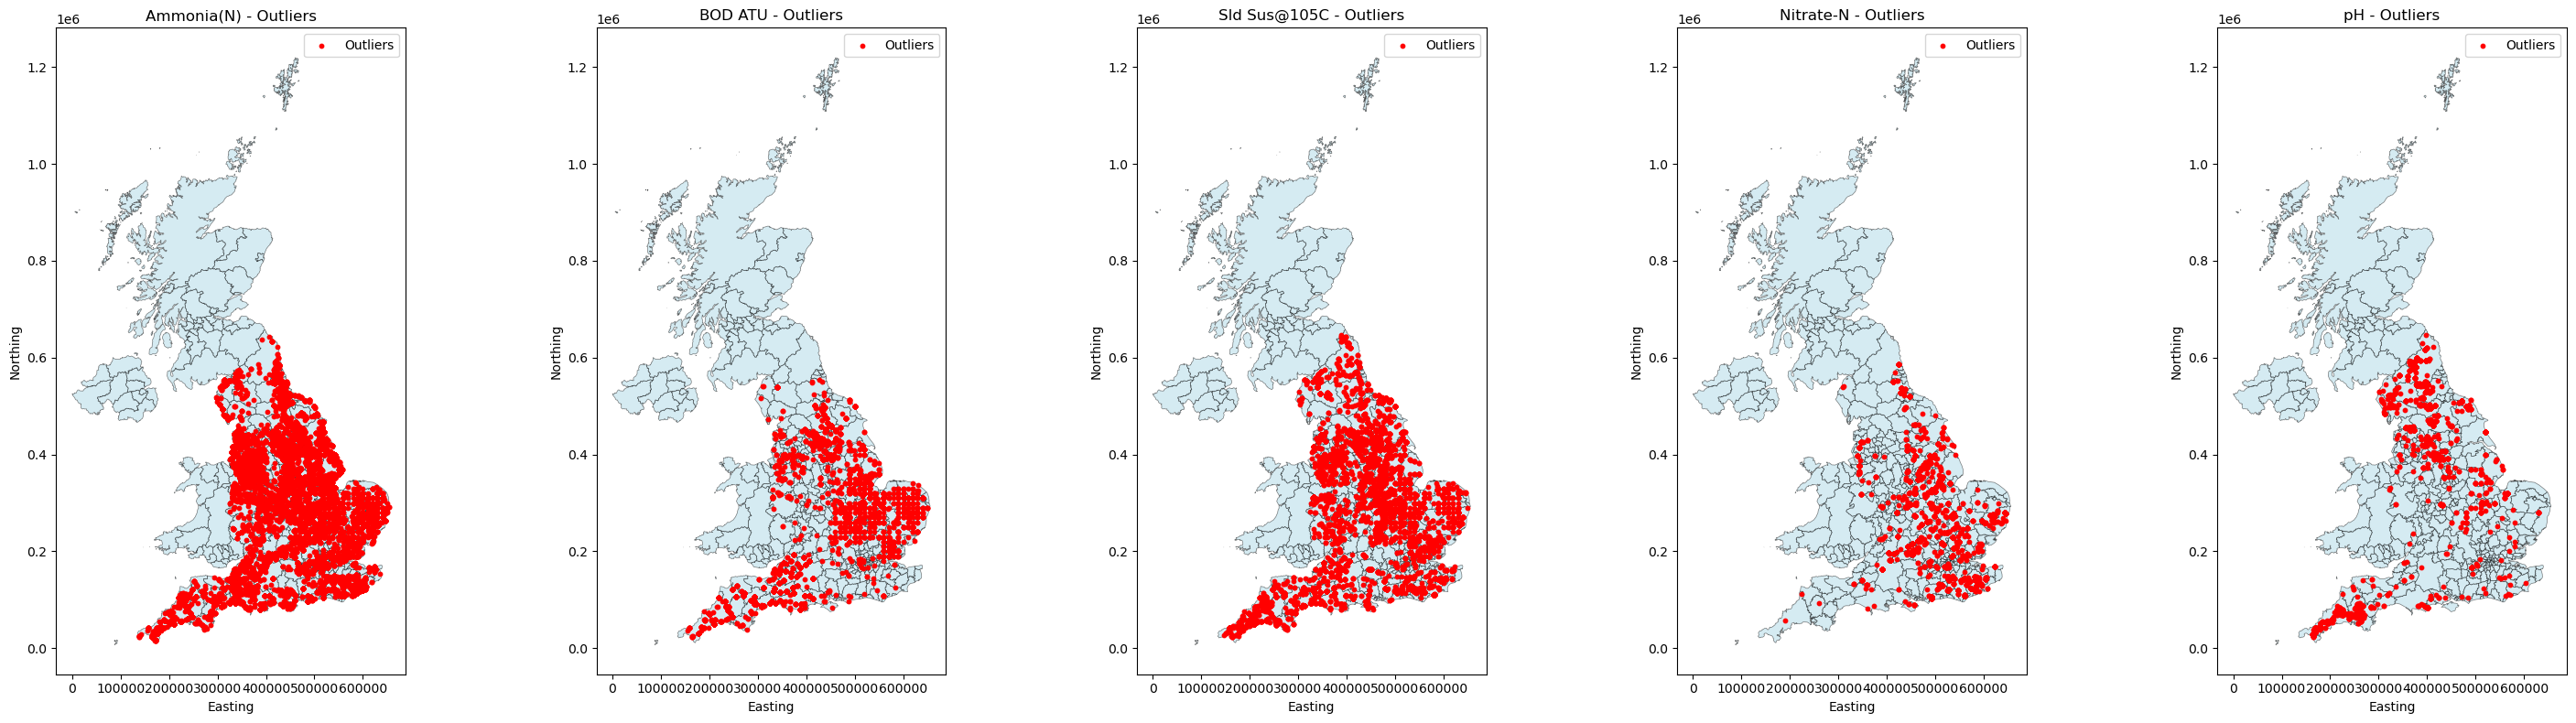

In [80]:
# Now, create GeoDataFrames for each parameter's outliers
gdf_outliers = {}
 
for param in parameters:
    outliers = outlier_dfs[param]
    # Create a GeoDataFrame using 'northing' and 'easting'
    gdf = gpd.GeoDataFrame(
        outliers, 
        geometry=gpd.points_from_xy(outliers['easting'], outliers['northing']), 
        crs="EPSG:27700"  # British National Grid (EPSG:27700)
    )
    # Add the GeoDataFrame to the dictionary
    gdf_outliers[param] = gdf
 
# Load the boundaries shapefile (assuming it's already loaded as 'boundaries' with the right CRS)
boundaries = boundaries.to_crs("EPSG:27700")  # Ensure CRS is correct for spatial join
 
# Perform spatial join between outliers and local authority boundaries
gdf_classified_outliers = {}
 
for param in parameters:
    gdf = gdf_outliers[param]
    # Perform spatial join to classify each outlier by local authority
    gdf_classified = gpd.sjoin(gdf, boundaries[['LAD22NM', 'geometry']], how="left", predicate="within")
    # Keep relevant columns
    gdf_classified = gdf_classified[['sample_date_time', 'northing', 'easting', 'LAD22NM', 'determinand_label', 
                                     'determinand_def', 'result', 'determinand_unit', 'sample_type', 'year']]
    # Store classified outliers
    gdf_classified_outliers[param] = gdf_classified
 
# Merge with local authority boundaries (to have all relevant information in one GeoDataFrame)
merged_outliers = {}
 
for param in parameters:
    gdf = gdf_classified_outliers[param]
    # Merge outliers GeoDataFrame with boundaries on 'LAD22NM'
    merge = boundaries.merge(gdf, left_on="LAD22NM", right_on="LAD22NM")
    # Store merged data
    merged_outliers[param] = merge
 
# Now, let's plot the distribution of the outliers across England for each parameter
num_params = len(parameters)

# Create subplots - one row, multiple columns (side by side)
fig, axes = plt.subplots(1, num_params, figsize=(6 * num_params, 8))  # Width scales with number of parameters

# If only one parameter, axes is not a list – convert to list for consistency
if num_params == 1:
    axes = [axes]

# Loop through parameters and plot on corresponding subplot
for i, param in enumerate(parameters):
    ax = axes[i]
    # Plot boundaries
    boundaries.plot(ax=ax, edgecolor="black", linewidth=0.5, color='lightblue', alpha=0.5)
    # Plot outlier points
    outlier_points = merged_outliers[param]
    ax.scatter(outlier_points['easting'], outlier_points['northing'], color='red', marker='o', s=10, label='Outliers')
    # Title and labels
    ax.set_title(f"{param} - Outliers")
    ax.set_xlabel("Easting")
    ax.set_ylabel("Northing")
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

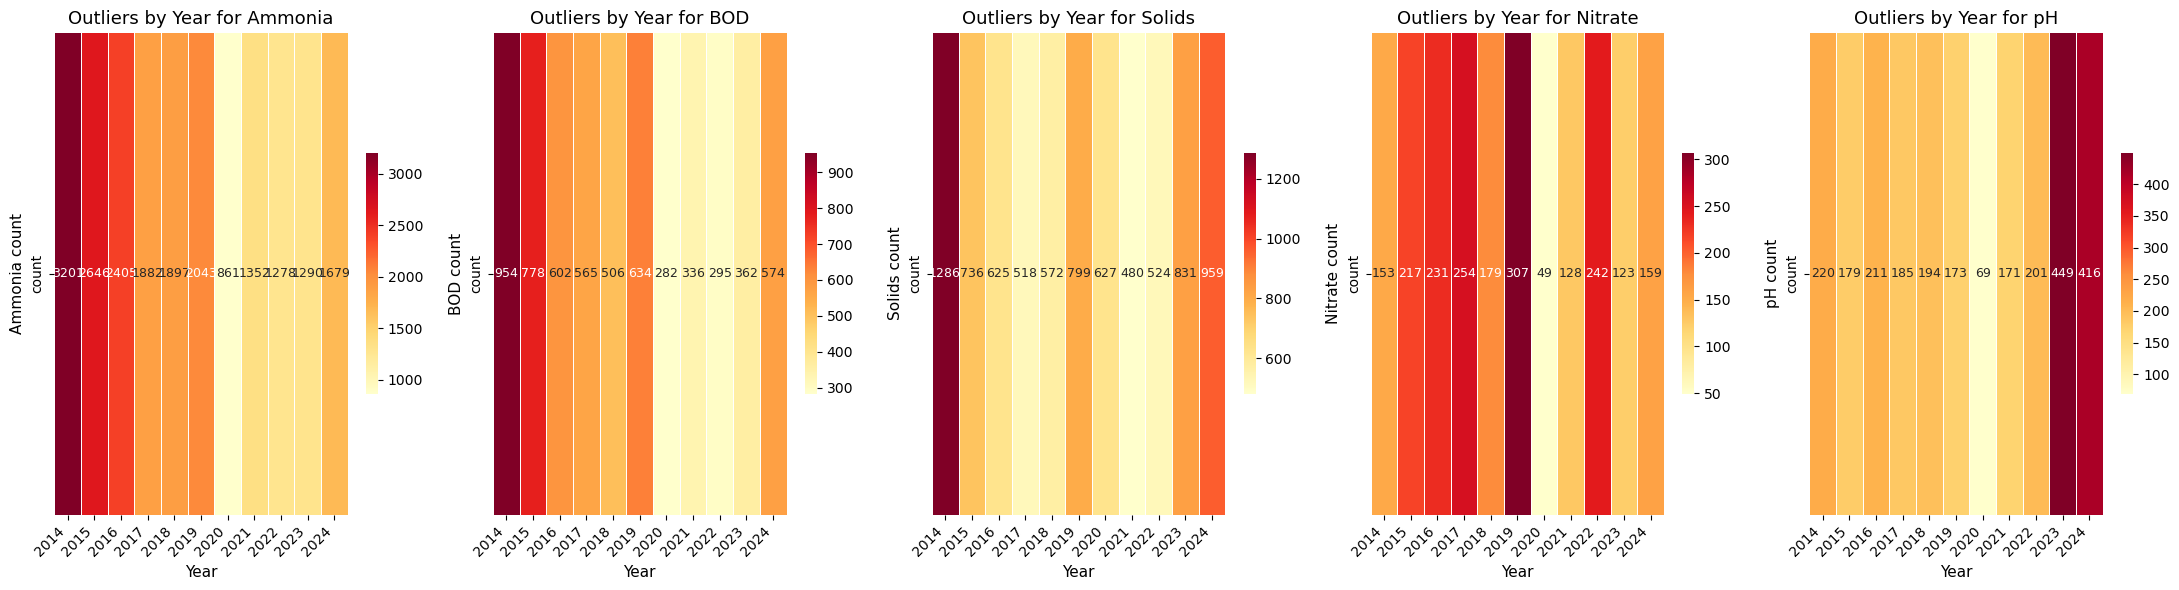

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Ensure datetime and extract years explicitly
for param, outlier_df in outlier_dfs.items():
    outlier_df['sample_date_time'] = pd.to_datetime(outlier_df['sample_date_time'], errors='coerce')
    outlier_df['year'] = outlier_df['sample_date_time'].dt.year
 
# List of labels for plotting (adjust as necessary)
labels = ['Ammonia', 'BOD', 'Solids', 'Nitrate', 'pH']
 
# Setup figure clearly
fig, axes = plt.subplots(1, len(outlier_dfs), figsize=(22, 6))
 
# Generate heatmaps clearly
for idx, (param, label) in enumerate(zip(outlier_dfs.keys(), labels)):
    df = outlier_dfs[param]
 
    # Count occurrences per year (ensure sorted years)
    df_counts = df.groupby('year').size().reset_index(name='count').sort_values(by='year')
 
    # Explicitly create pivot structure suitable for heatmap
    df_pivot = df_counts.set_index('year').T
 
    # Plot heatmap clearly with readable font sizes
    sns.heatmap(df_pivot, cmap='YlOrRd', annot=True, fmt=".0f", linewidths=0.5, ax=axes[idx],
                annot_kws={"size": 9}, cbar_kws={'shrink': 0.5})
 
    axes[idx].set_title(f'Outliers by Year for {label}', fontsize=13)
    axes[idx].set_xlabel('Year', fontsize=11)
    axes[idx].set_ylabel(f'{label} count', fontsize=11)
 
    # Rotate x-ticks for clear readability
    axes[idx].set_xticklabels(df_pivot.columns, rotation=45, ha='right')
 
# Improve spacing
plt.tight_layout()
 
# Display the plot
plt.show()

In [82]:
# Iterate through the outlier_dfs dictionary to print the shape of each DataFrame
for param, outlier_df in outlier_dfs.items():
    print(f"Shape of outlier DataFrame for {param}: {outlier_df.shape}")


Shape of outlier DataFrame for Ammonia(N): (20534, 11)
Shape of outlier DataFrame for BOD ATU: (5888, 11)
Shape of outlier DataFrame for Sld Sus@105C: (7957, 11)
Shape of outlier DataFrame for Nitrate-N: (2042, 11)
Shape of outlier DataFrame for pH: (2468, 11)
